In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker

from utils import *
from plot_utils import sfac_plotter
#from AnalyseDefects import AnalyseDefects




### DEVELOPMENT  

In [2]:
from AnalyseDefects_dev import AnalyseDefects

In [3]:
def gen_analysis_dict(LL, mode):

    dshort = dict(path = f'C:\\Users\\Simon Andersen\\Documents\\Uni\\Speciale\\Hyperuniformity\\nematic_analysis{LL}_LL0.05', \
              suffix = "short", priority = -1, LX = LL, Nframes = 181)
    dlong = dict(path = f'C:\\Users\\Simon Andersen\\Documents\\Uni\\Speciale\\Hyperuniformity\\nematic_analysis{LL}_LL0.05_long', \
                suffix = "long", priority = 1, LX = LL, Nframes = 400)
    priority_vl = 2 if LL == 512 else 3
    dvery_long = dict(path = f'C:\\Users\\Simon Andersen\\Documents\\Uni\\Speciale\\Hyperuniformity\\nematic_analysis{LL}_LL0.05_very_long',\
                    suffix = "very_long", priority = priority_vl, LX = LL, Nframes = 1500)
    dvery_long2 = dict(path = f'C:\\Users\\Simon Andersen\\Documents\\Uni\\Speciale\\Hyperuniformity\\nematic_analysis{LL}_LL0.05_very_long_v2',\
                    suffix = "very_long2", priority = 3 if priority_vl == 2 else 2, LX = LL, Nframes = 1500)

    if mode == 'all':
        if LL == 2048:
            defect_list = [dshort, dlong]
        else:
            defect_list = [dshort, dlong, dvery_long, dvery_long2] if LL in [256] else [dshort, dlong, dvery_long]
    else:
        defect_list = [dshort]
    
    return defect_list



LL = 2048
output_path = f'data\\nematic_analysis{LL}_LL0.05'
mode = 'all' # 'all' or 'short'

defect_list = gen_analysis_dict(LL, mode)

ad = AnalyseDefects(defect_list, output_path=output_path)

extract = False
analyze = False
merge = False

C:\Users\Simon Andersen\AppData\Local\Temp\ipykernel_5296\1957941350.py:26: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o-" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(act_list,corr_time_av[0,:,0], yerr=corr_time_av[0,:,1],


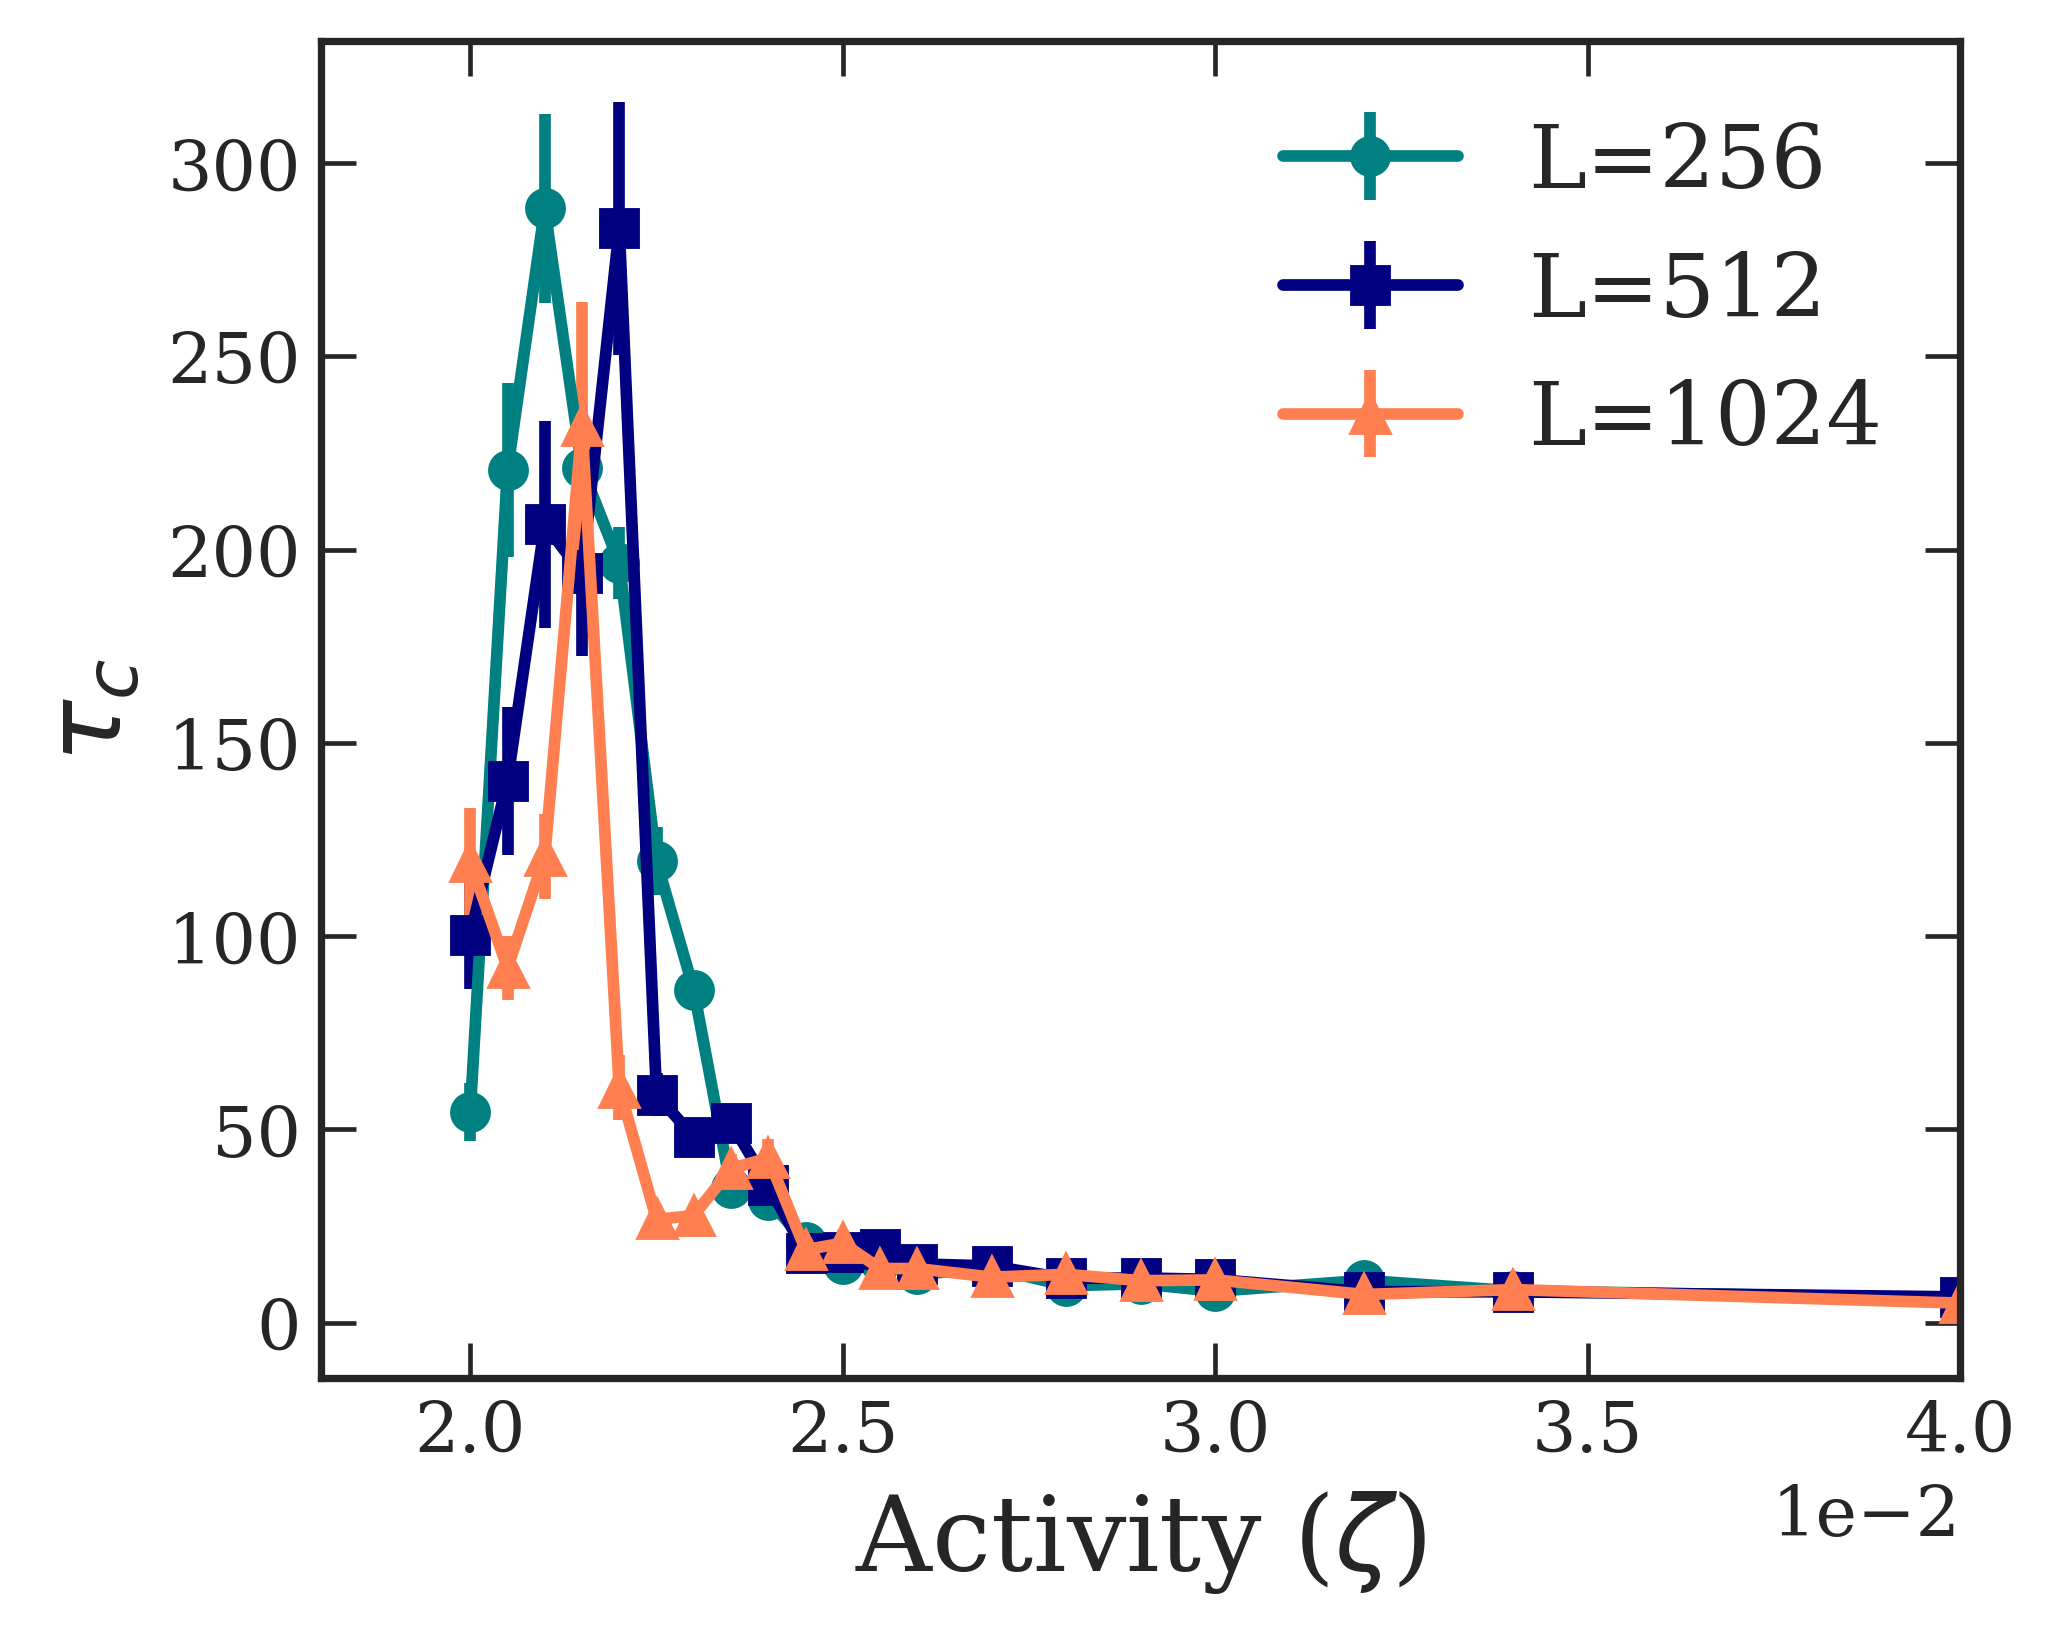

In [19]:
fig, ax = plt.subplots(ncols=1,nrows=1, figsize = (5,4))
color = ['r','g','b', 'k']
marker = ['o','s','^','d']

act_sigma = [0.0205, 0.021,0.0215,0.022]#, 0.023]
sigma_arr = np.zeros([4,len(act_sigma),2])

L_list = [256,512,1024]#,2048]
act_min_idx_list = [3, 3, 2]

for j, LL in enumerate(L_list):

    output_path = f'data\\nematic_analysis{LL}_LL0.05'
    mode = 'all' # 'all' or 'short'

    defect_list = gen_analysis_dict(LL, mode)

    ad = AnalyseDefects(defect_list, output_path=output_path)

    out_path_merged = ad.output_main_path + '\\merged_results'

    order_param_av = np.load(out_path_merged + '\\order_param_av.npy')
    act_list = np.load(out_path_merged + '\\activity_list.npy')[act_min_idx_list[j]:]   
    corr_time_av = np.load(out_path_merged + '\\corr_time_av.npy')[:,act_min_idx_list[j]:,:]

    ax.errorbar(act_list,corr_time_av[0,:,0], yerr=corr_time_av[0,:,1], 
                label=f'L={LL}', fmt='o-', marker=marker[j])

ax.legend();
ax.set_xlim([0.018,0.04])
ax.set_xlabel(r'Activity ($\zeta$)')
ax.set_ylabel(r'$\tau_c$')
fig.tight_layout()

In [6]:
out_path_merged = ad.output_main_path + '\\merged_results'

order_param_av = np.load(out_path_merged + '\\order_param_av.npy')
act_list = np.load(out_path_merged + '\\activity_list.npy')
corr_time_av = np.load(out_path_merged + '\\corr_time_av.npy')
corr_time_av.shape

(4, 22, 2)

In [ ]:
out_path_merged = ad.output_main_path + '\\merged_results'

order_param_av = np.load(out_path_merged + '\\order_param_av.npy')
act_list = np.load(out_path_merged + '\\activity_list.npy')
corr_time_av = np.load(out_path_merged + '\\corr_time_av.npy')


plt.errorbar(act_list,corr_time_av[0,:,0], yerr=corr_time_av[0,:,1], label='tau', fmt='o-')
plt.errorbar(act_list,corr_time_av[1,:,0], yerr=corr_time_av[1,:,1], label='tau_simp', fmt='o-') 
plt.errorbar(act_list,corr_time_av[1,:,0], yerr=corr_time_av[1,:,1], label='tau_simp', fmt='o-') 
plt.xlim(0.018, 0.03)
plt.title(f"L={LL}")
plt.legend()

256


C:\Users\Simon Andersen\AppData\Local\Temp\ipykernel_5296\4270116191.py:49: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var1 = np.nanvar(def_arr[conv:, i, :],axis=0) / av_defects[i,0]
C:\Users\Simon Andersen\AppData\Local\Temp\ipykernel_5296\4270116191.py:50: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var2 = np.nanvar(def_arr[conv:, i, :],axis=0) / av_defects[i,0]**2 #   .flatten() #/ normalizer


512
1024
2048


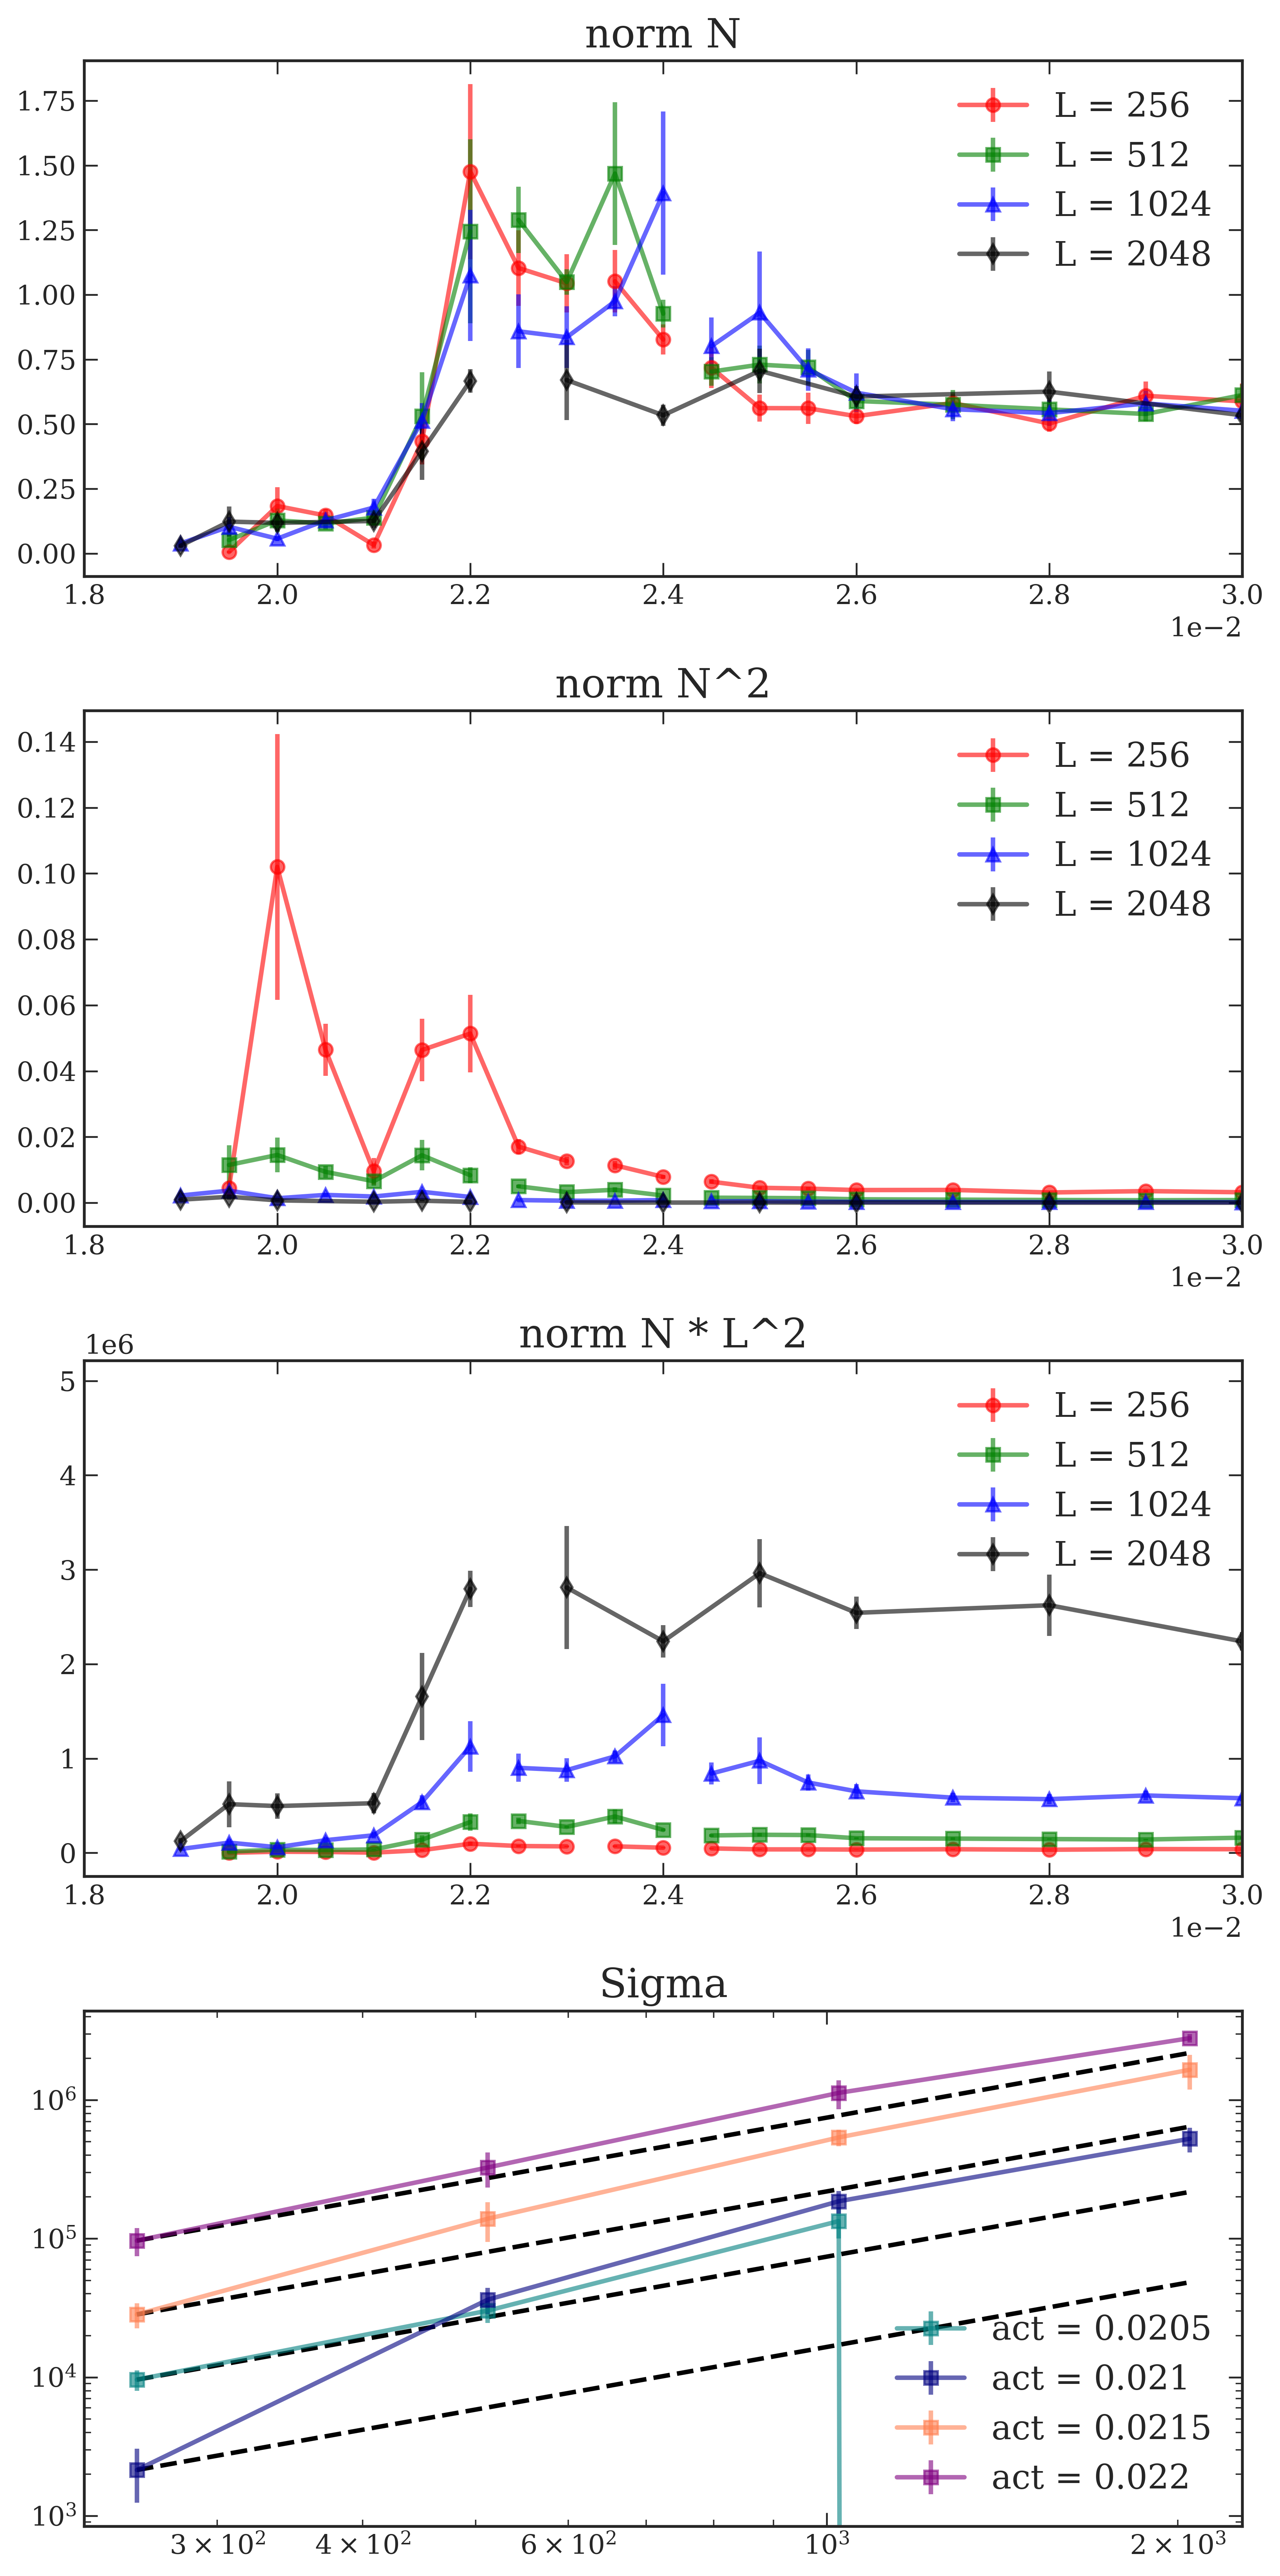

In [4]:

fig, ax = plt.subplots(ncols=1,nrows=4, figsize = (8,16))
color = ['r','g','b', 'k']
marker = ['o','s','^','d']

act_sigma = [0.0205, 0.021,0.0215,0.022]#, 0.023]
sigma_arr = np.zeros([4,len(act_sigma),2])

L_list = [256,512,1024,2048]

for j, LL in enumerate(L_list):

    output_path = f'data\\nematic_analysis{LL}_LL0.05'
    mode = 'all' # 'all' or 'short'

    defect_list = gen_analysis_dict(LL, mode)

    ad = AnalyseDefects(defect_list, output_path=output_path)

    N_list = [-1 - i for i in range(ad.Ndata)]

    print(LL)

    for N in N_list:
        Nexp = ad.Nexp[N]
        L = ad.LX[N]
        act_list = ad.act_list[N]
        conv_list = ad.conv_list[N]
        def_arr = ad.get_arrays_full(N)[0]
        av_defects = ad.get_arrays_av(N)[-1]

        var_arr = np.zeros((len(act_list), 4))

        for i, (act, conv) in enumerate(zip(act_list, conv_list)):
            if LL < 1000:
                if N < -1:
                    if act <= max(max(ad.act_list[N+1]), max(ad.act_list[-1])):
                        continue
            else:
                if N < -1:
                    if act <= max(ad.act_list[N+1]):
                        continue
            #normalizer = L**2 if normalize else 1
            #conv=1100 if N == -1 else conv
            if LL < 2000:
                conv=1250 if N == -1 else conv
            else:
                conv=150 if N == -1 else conv
            #conv=150 if N == -1 else conv
            var1 = np.nanvar(def_arr[conv:, i, :],axis=0) / av_defects[i,0] 
            var2 = np.nanvar(def_arr[conv:, i, :],axis=0) / av_defects[i,0]**2 #   .flatten() #/ normalizer

            var_arr[i,0] = np.nanmean(var1)
            var_arr[i,1] = np.nanstd(var1)/np.sqrt(Nexp)
            var_arr[i,2] = np.nanmean(var2)
            var_arr[i,3] = np.nanstd(var2)/np.sqrt(Nexp)    

            if N == -1 and act in act_sigma:
                i_sigma = act_sigma.index(act)
                sigma_arr[j, i_sigma,:] = var_arr[i,:2] * LL**2

      #  print(sigma_arr)
    # print(var_arr)
       # print("S",np.where(var_arr[:,0] > 0)[0])
        first_non_nan = np.where(var_arr[:,0] > 0)[0][0] if len(np.where(var_arr[:,0] > 0)[0]) > 0 else -1
        label = f'L = {LL}' if N == -1 else None
        if first_non_nan > -1:
            ax[0].errorbar(act_list[first_non_nan:], var_arr[first_non_nan:,0], 
                           yerr = var_arr[first_non_nan:,1], alpha=.6,
                             fmt=f'{marker[j]}-', label = label,color = color[j])
            ax[1].errorbar(act_list[first_non_nan:], var_arr[first_non_nan:,2],
                            yerr = var_arr[first_non_nan:,3], alpha=.6,
                              fmt=f'{marker[j]}-', label = label,color = color[j])
            ax[2].errorbar(act_list[first_non_nan:], var_arr[first_non_nan:,0] * LL**2,
                            yerr = var_arr[first_non_nan:,1] * LL**2, alpha=.6,
                              fmt=f'{marker[j]}-', label = label,color = color[j])
            #ax[3].errorbar([LL] * len(var_arr[first_non_nan:,0]), var_arr[first_non_nan:,0] * LL**2, yerr = var_arr[first_non_nan:,1] * LL**2, alpha=.6,
             #                 fmt=f'{marker[j]}-', label = label,color = color[j])
        ax[0].set_xlim([0.018,0.03])
        ax[1].set_xlim([0.018,0.03])
        ax[2].set_xlim([0.018,0.03])
        ax[0].set_title('norm N')
        ax[0].legend()
        ax[1].set_title('norm N^2')
        ax[1].legend()
        ax[2].set_title('norm N * L^2')
        ax[2].legend()
slope=1.5
for k in range(len(act_sigma)):
    ax[3].errorbar(L_list, sigma_arr[:,k,0], yerr = sigma_arr[:,k,1], alpha=.6,
                              fmt=f's-', label = f'act = {act_sigma[k]}')
    ax[3].plot(L_list, sigma_arr[0,k,0] / L_list[0]**slope * np.array(L_list)**slope, 'k--')

ax[3].set_title('Sigma')
ax[3].legend();
ax[3].set_xscale('log') 
ax[3].set_yscale('log')

C:\Users\Simon Andersen\AppData\Local\Temp\ipykernel_11024\4272647127.py:19: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var1 = np.nanvar(def_arr[conv:, i, :],axis=0) / av_defects[i,0] #   .flatten() #/ normalizer
C:\Users\Simon Andersen\AppData\Local\Temp\ipykernel_11024\4272647127.py:20: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var2 = np.nanvar(def_arr[conv:, i, :],axis=0) / av_defects[i,0]**2 #   .flatten() #/ normalizer


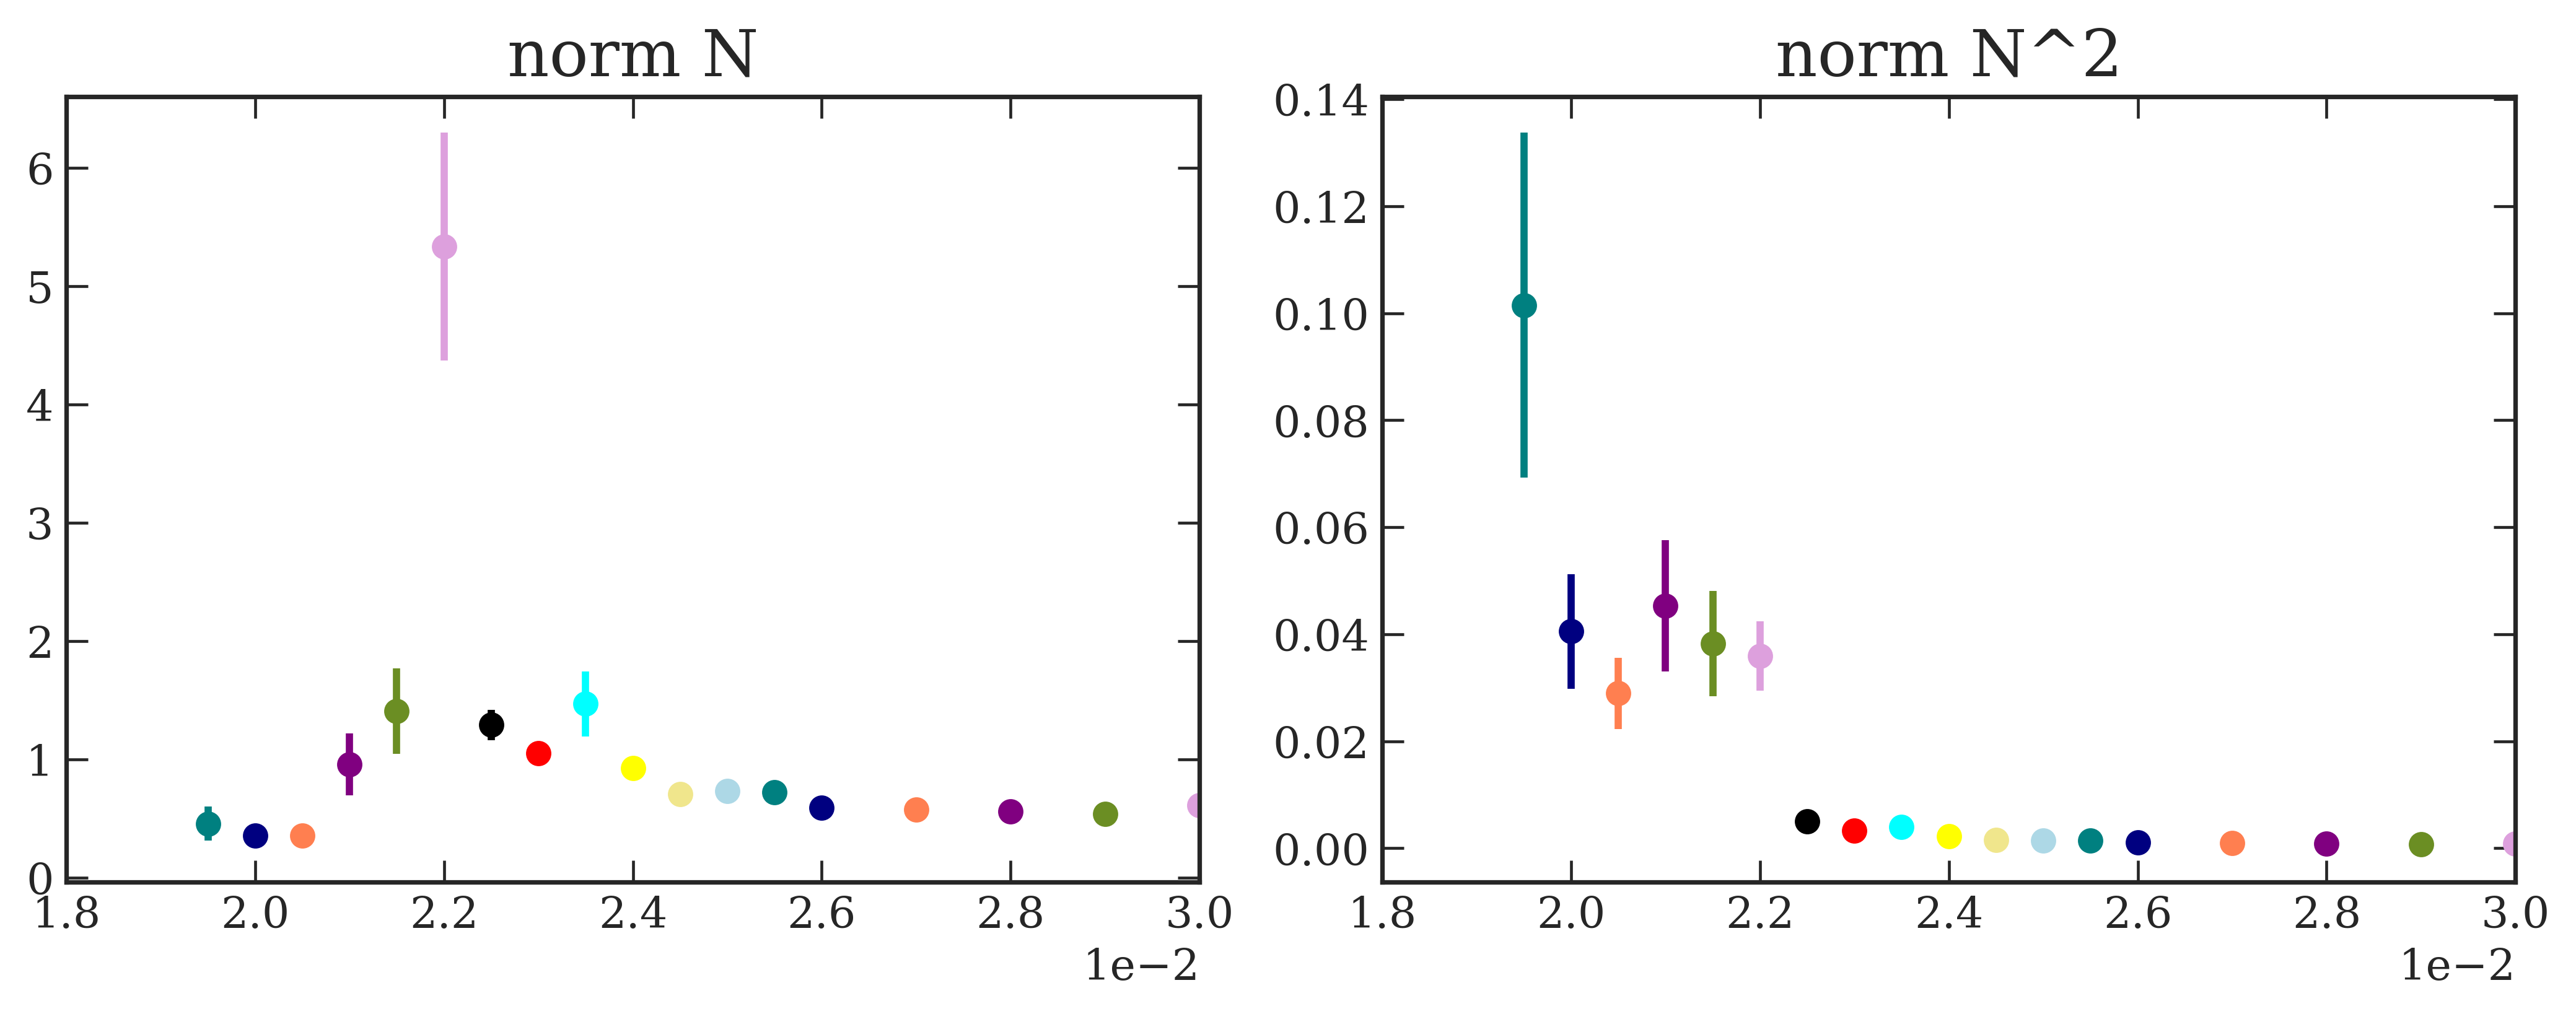

In [67]:
N_list = [-1,-2,-3,-4]
fig, ax = plt.subplots(ncols=2, figsize = (10,4))

for N in N_list:

    Nexp = ad.Nexp[N]
    L = ad.LX[N]
    act_list = ad.act_list[N]
    conv_list = ad.conv_list[N]
    def_arr = ad.get_arrays_full(N)[0]
    av_defects = ad.get_arrays_av(N)[-1]

    for i, (act, conv) in enumerate(zip(act_list, conv_list)):
        if N < -1:
            if act <= max(max(ad.act_list[N+1]), max(ad.act_list[-1])):
                continue
        #normalizer = L**2 if normalize else 1
        #conv=1100 if N == -1 else conv
        var1 = np.nanvar(def_arr[conv:, i, :],axis=0) / av_defects[i,0] #   .flatten() #/ normalizer
        var2 = np.nanvar(def_arr[conv:, i, :],axis=0) / av_defects[i,0]**2 #   .flatten() #/ normalizer

        ax[0].errorbar(act, np.nanmean(var1), yerr = np.nanstd(var1)/np.sqrt(Nexp), fmt='o')
        ax[1].errorbar(act, np.nanmean(var2), yerr = np.nanstd(var2)/np.sqrt(Nexp), fmt='o')
        ax[0].set_xlim([0.018,0.030])
        ax[1].set_xlim([0.018,0.030])
        ax[0].set_title('norm N')
        ax[1].set_title('norm N^2')


C:\Users\Simon Andersen\AppData\Local\Temp\ipykernel_11024\2632838043.py:21: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var1 = np.nanvar(def_arr[conv:, i, :],axis=0) / av_defects[i,0] #   .flatten() #/ normalizer
C:\Users\Simon Andersen\AppData\Local\Temp\ipykernel_11024\2632838043.py:22: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var2 = np.nanvar(def_arr[conv:, i, :],axis=0) / av_defects[i,0]**2 #   .flatten() #/ normalizer


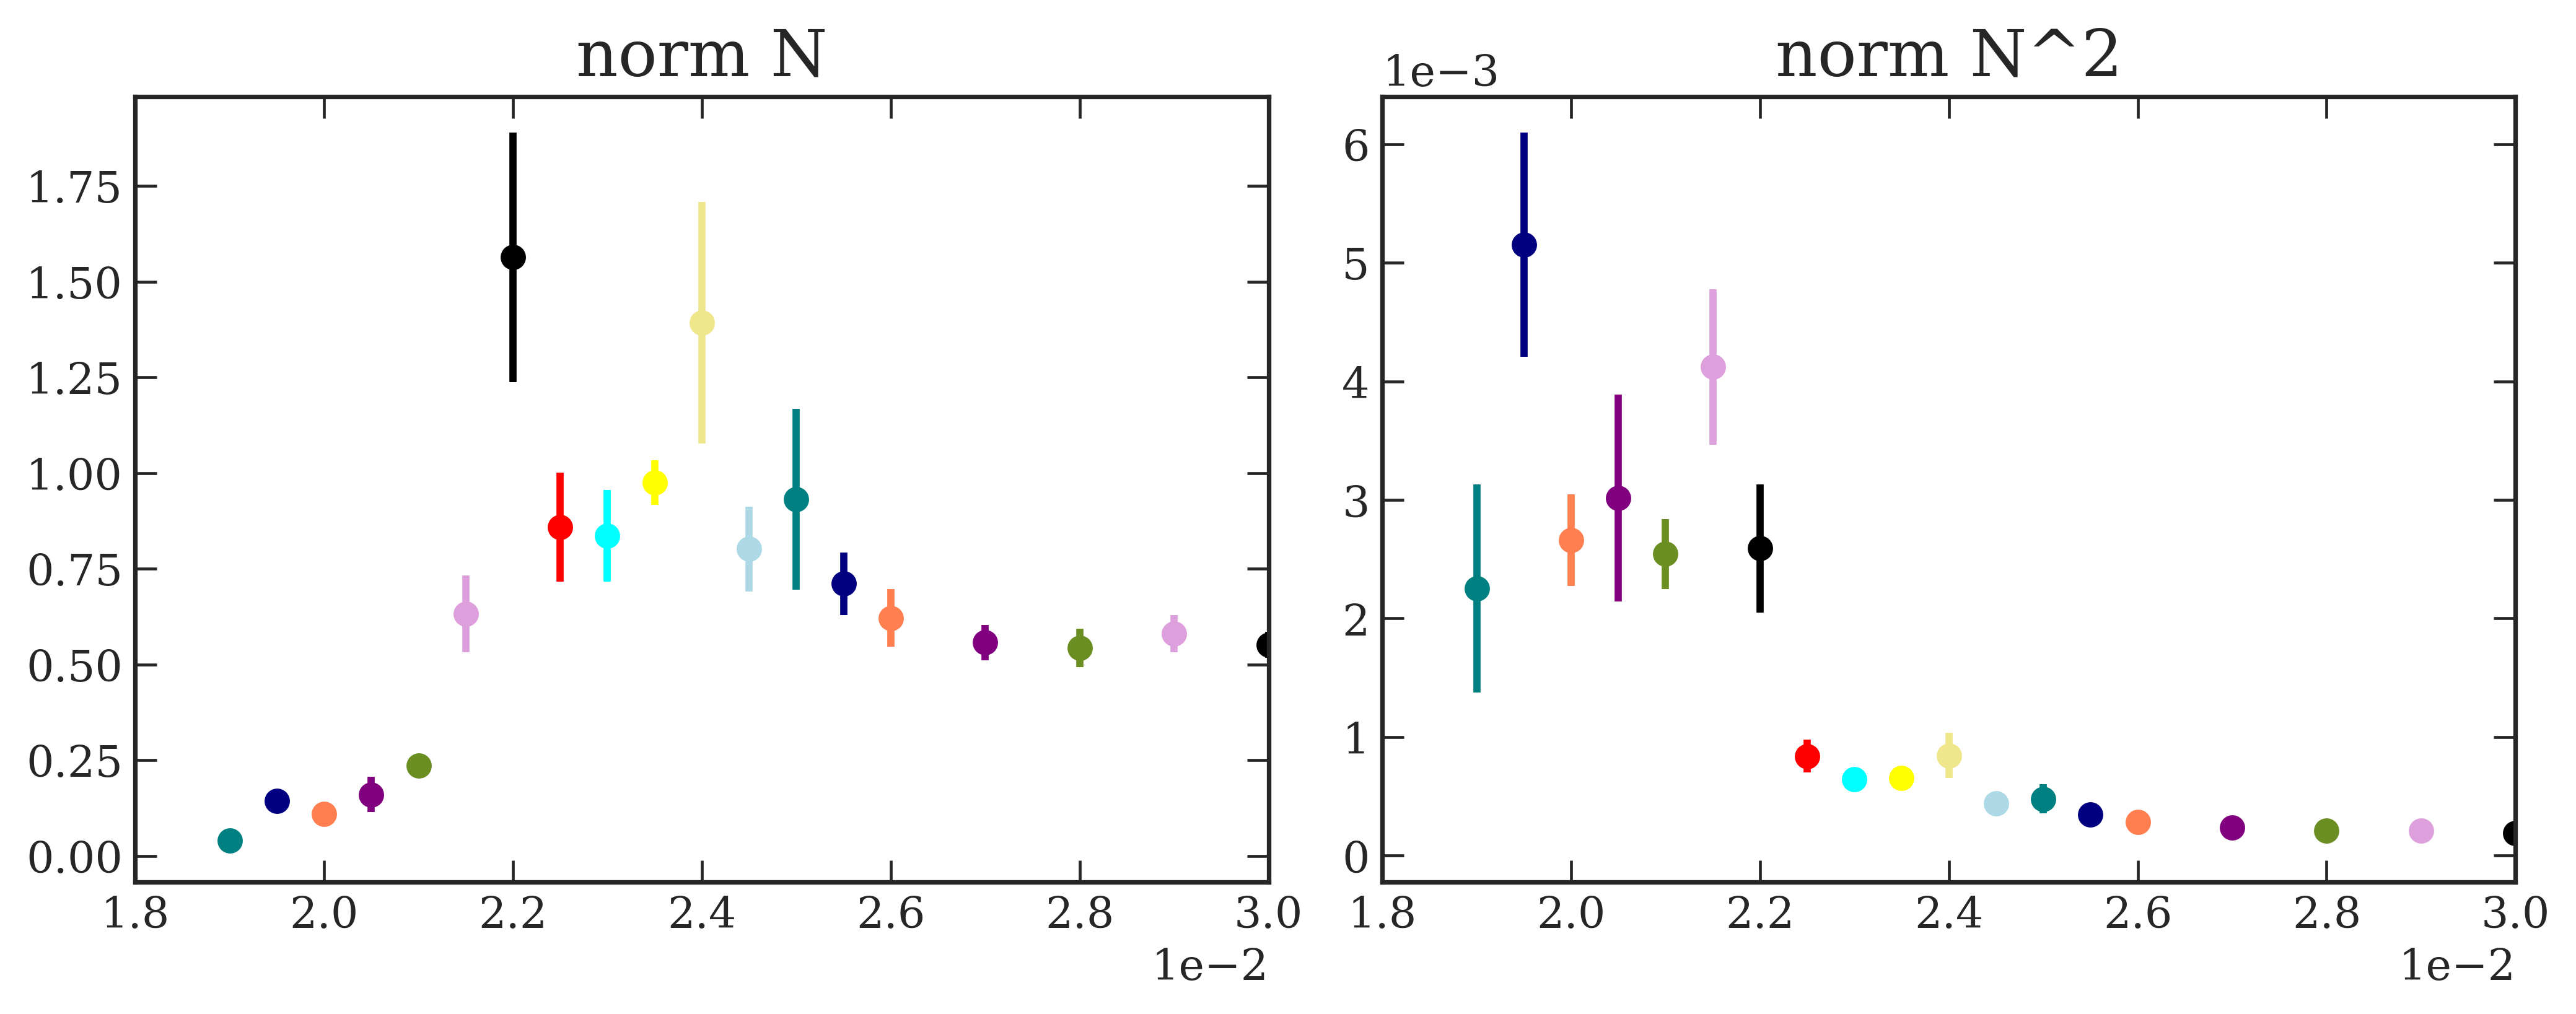

In [63]:

N_list = [-1,-2,-3]
fig, ax = plt.subplots(ncols=2, figsize = (10,4))

for N in N_list:

    Nexp = ad.Nexp[N]
    L = ad.LX[N]
    act_list = ad.act_list[N]
    conv_list = ad.conv_list[N]
    def_arr = ad.get_arrays_full(N)[0]
    av_defects = ad.get_arrays_av(N)[-1]

    for i, (act, conv) in enumerate(zip(act_list, conv_list)):
        if N < -1:
            if act <= max(ad.act_list[N+1]):
                continue
        normalizer = L**2 if normalize else 1
        conv=1100 if N == -1 else conv
        var1 = np.nanvar(def_arr[conv:, i, :],axis=0) / av_defects[i,0] #   .flatten() #/ normalizer
        var2 = np.nanvar(def_arr[conv:, i, :],axis=0) / av_defects[i,0]**2 #   .flatten() #/ normalizer

        ax[0].errorbar(act, np.nanmean(var1), yerr = np.nanstd(var1)/np.sqrt(Nexp), fmt='o')
        ax[1].errorbar(act, np.nanmean(var2), yerr = np.nanstd(var2)/np.sqrt(Nexp), fmt='o')
        ax[0].set_xlim([0.018,0.030])
        ax[1].set_xlim([0.018,0.030])
        ax[0].set_title('norm N')
        ax[1].set_title('norm N^2')


In [ ]:
normalize = True

N = -2
L = ad.LX[N]
act_list = ad.act_list[N]
conv_list = ad.conv_list[N]
def_arr = ad.get_arrays_full(N)[0]

nrows = int(np.ceil(len(act_list) / 3))
fig, ax = plt.subplots(nrows = nrows, ncols = 3, figsize = (12, 4 * nrows))
ax = ax.flatten()

for i, (act, conv) in enumerate(zip(act_list, conv_list)):
    normalizer = L**2 if normalize else 1
    defects = def_arr[conv:, i, :].flatten() #/ normalizer
    bins = 20 if act < 0.021 else 40
    ax[i].hist(defects, density = True, bins=bins)#, histtype='step')
    ax[i].set_title(act)

In [ ]:

normalize = True

N = -1
L = ad.LX[N]
act_list = ad.act_list[N]
conv_list = ad.conv_list[N]
def_arr = ad.get_arrays_full(N)[0]

nrows = int(np.ceil(len(act_list) / 3))
fig, ax = plt.subplots(nrows = nrows, ncols = 3, figsize = (12, 4 * nrows))
ax = ax.flatten()

for i, (act, conv) in enumerate(zip(act_list, conv_list)):
    normalizer = L**2 if normalize else 1
    defects = def_arr[conv:, i, :].flatten() #/ normalizer
    bins = 20 if act < 0.021 else 30
    ax[i].hist(defects, density = True, bins=bins)#, histtype='step')
    ax[i].set_title(act)


In [ ]:

normalize = True


N = -1
L = ad.LX[N]
Nexp = ad.Nexp[N]
act_list = ad.act_list[N]
act = 0.022
act_idx = act_list.index(act)

conv_list = ad.conv_list[N]
def_arr = ad.get_arrays_full(N)[0]

nrows = int(np.ceil(Nexp / 3))
fig, ax = plt.subplots(nrows = nrows, ncols = 3, figsize = (12, 4 * nrows))
ax = ax.flatten()

for i in range(Nexp):
    normalizer = L**2 if normalize else 1
    defects = def_arr[conv_list[act_idx]:, act_idx, i].flatten() #/ normalizer
  #
  #  defects = def_arr[:, act_idx, i].flatten() #/ normalizer
    bins = 20 #if act < 0.021 else 30
    ax[i].hist(defects, density = True, bins=bins,alpha=.6)#, histtype='step')
    ax[i].hist(def_arr[conv_list[act_idx]:, act_idx, :].flatten(), density = True, bins=bins, label=f'Full', alpha=.7)
  
    ax[i].set_title(i)

In [33]:
out_path_merged = ad.output_main_path + '\\merged_results'

order_param_av = np.load(out_path_merged + '\\order_param_av.npy')
act_list = np.load(out_path_merged + '\\activity_list.npy')
corr_time_av = np.load(out_path_merged + '\\corr_time_av.npy')

plt.errorbar(act_list,corr_time_av[1,:,0], yerr=corr_time_av[1,:,1], label='tau_simp', fmt='o-') 
plt.xlim(0.018, 0.03)
plt.title(f"L={LL}")
plt.legend()

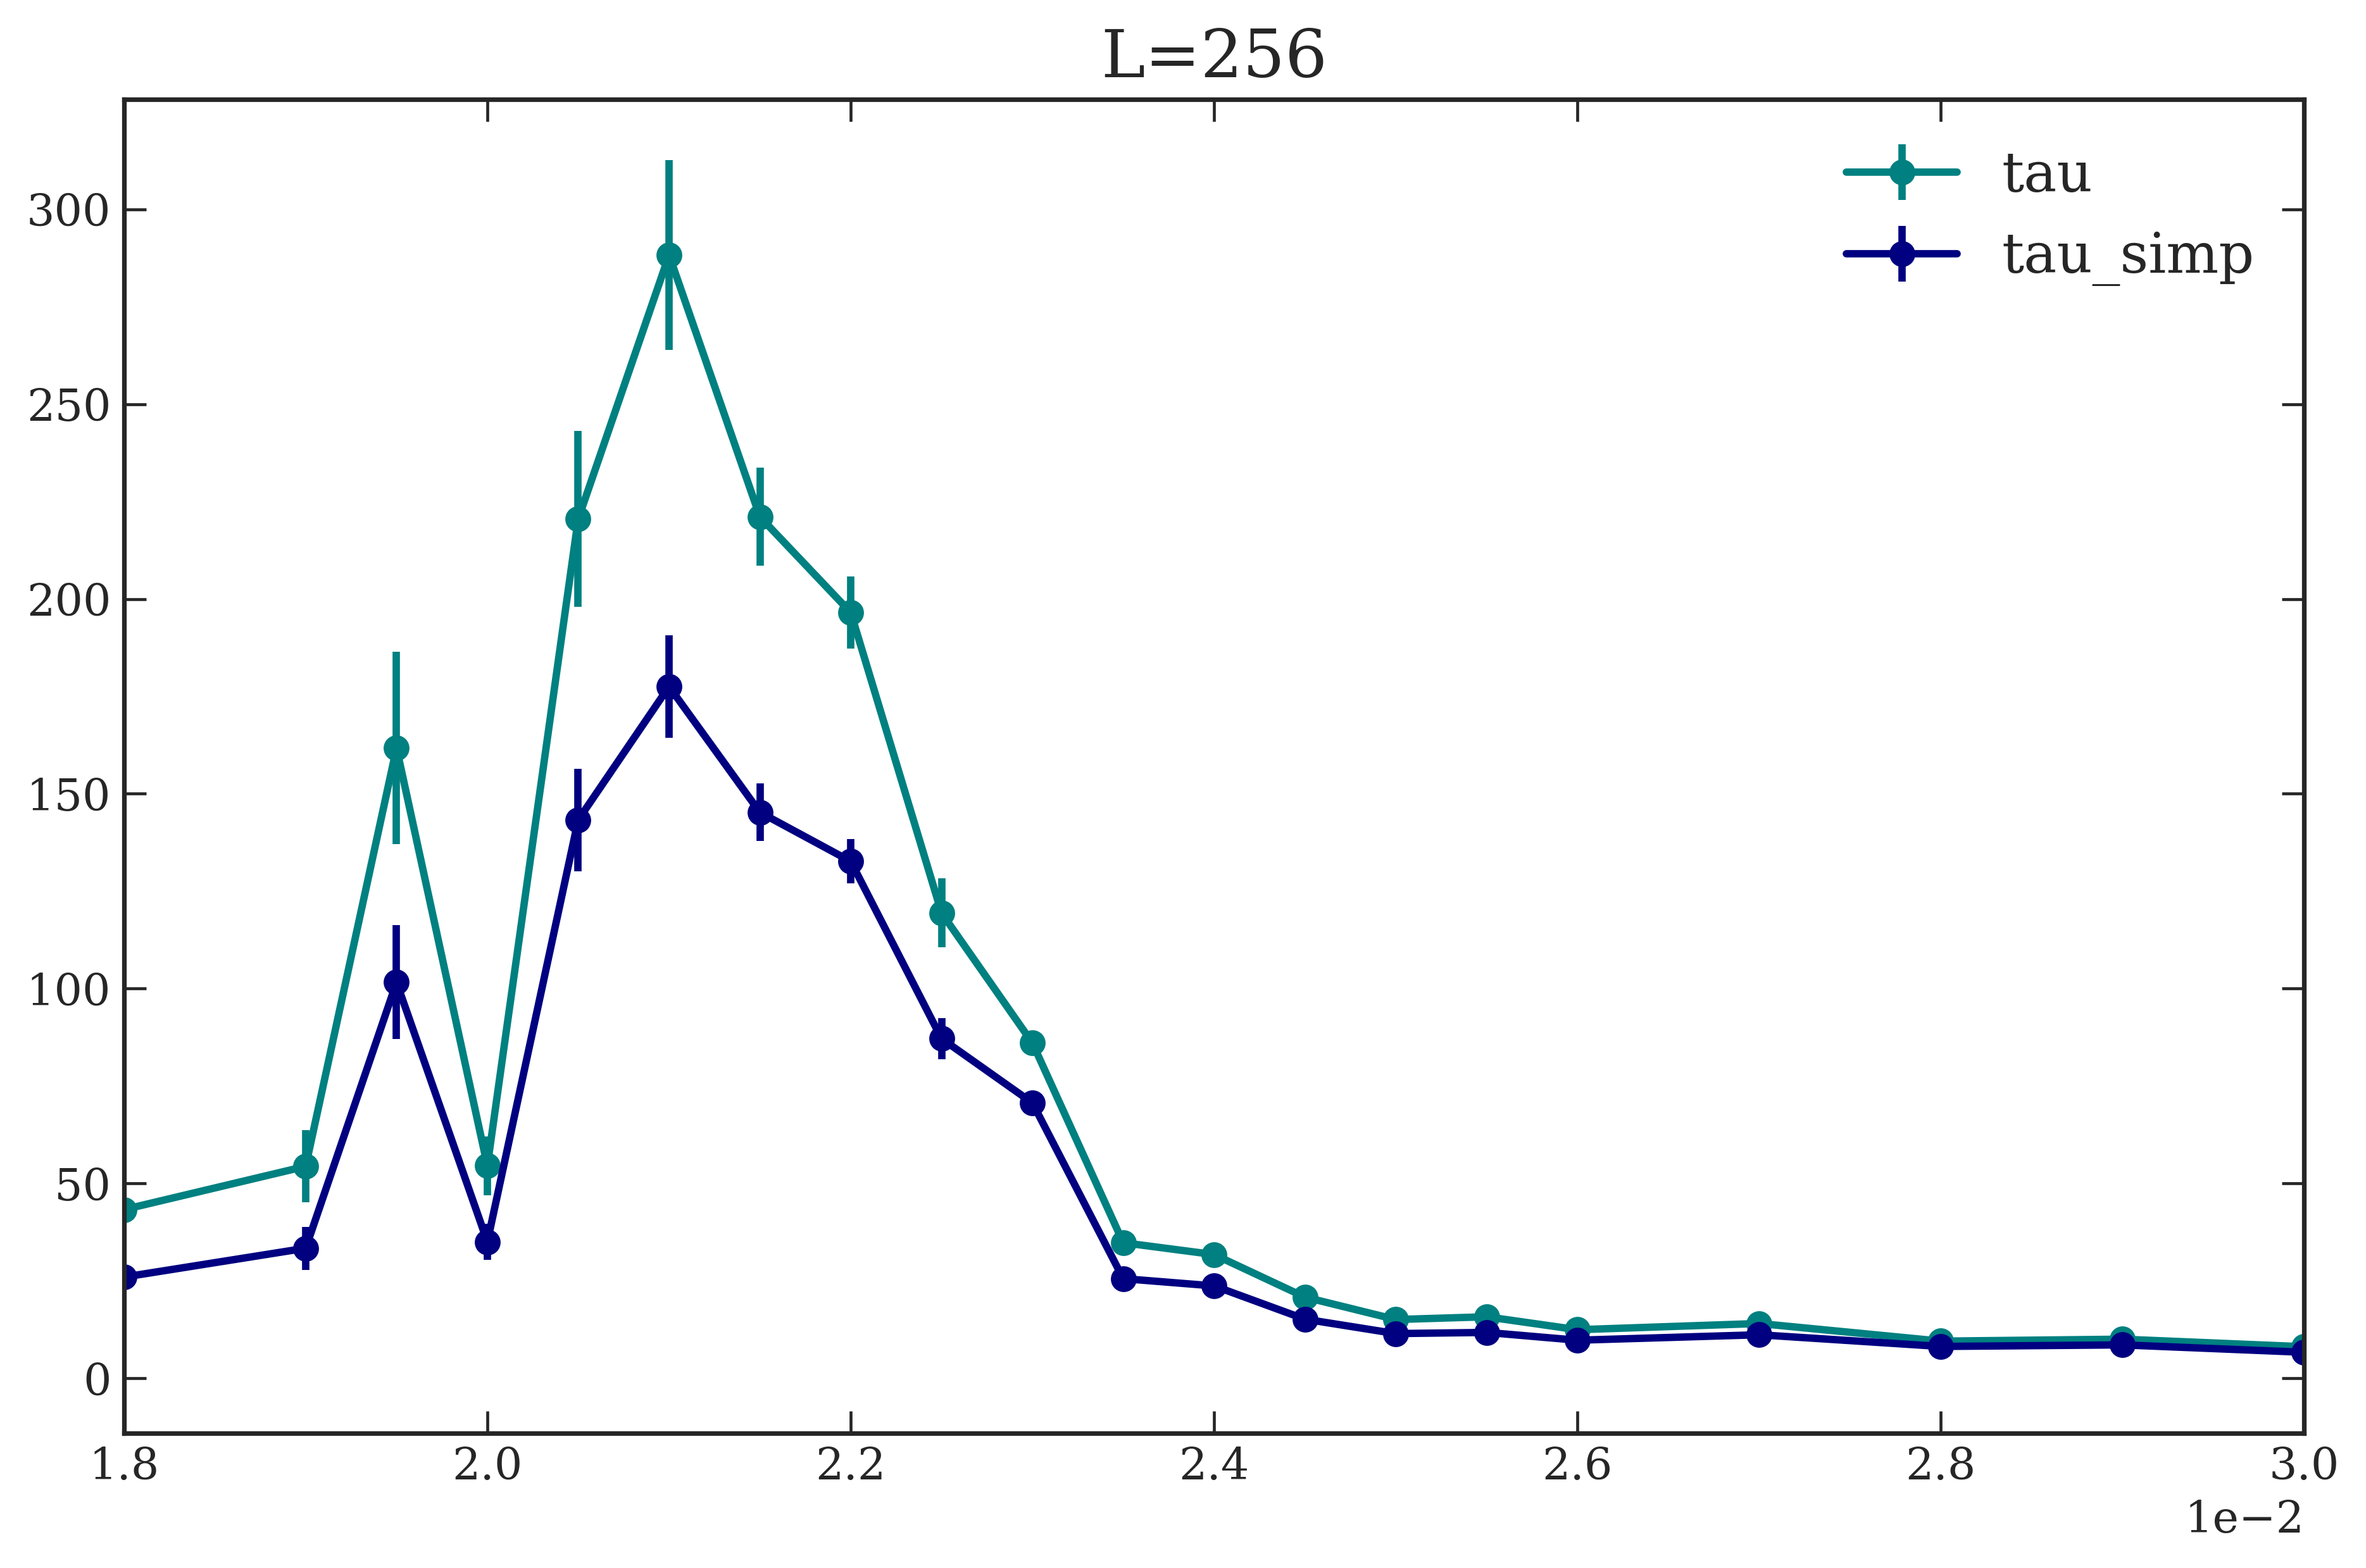

In [31]:
plt.errorbar(act_list,corr_time_av[0,:,0], yerr=corr_time_av[0,:,1], label='tau', fmt='o-')
plt.errorbar(act_list,corr_time_av[1,:,0], yerr=corr_time_av[1,:,1], label='tau_simp', fmt='o-') 
plt.xlim(0.018, 0.03)
plt.title(f"L={LL}")
plt.legend()

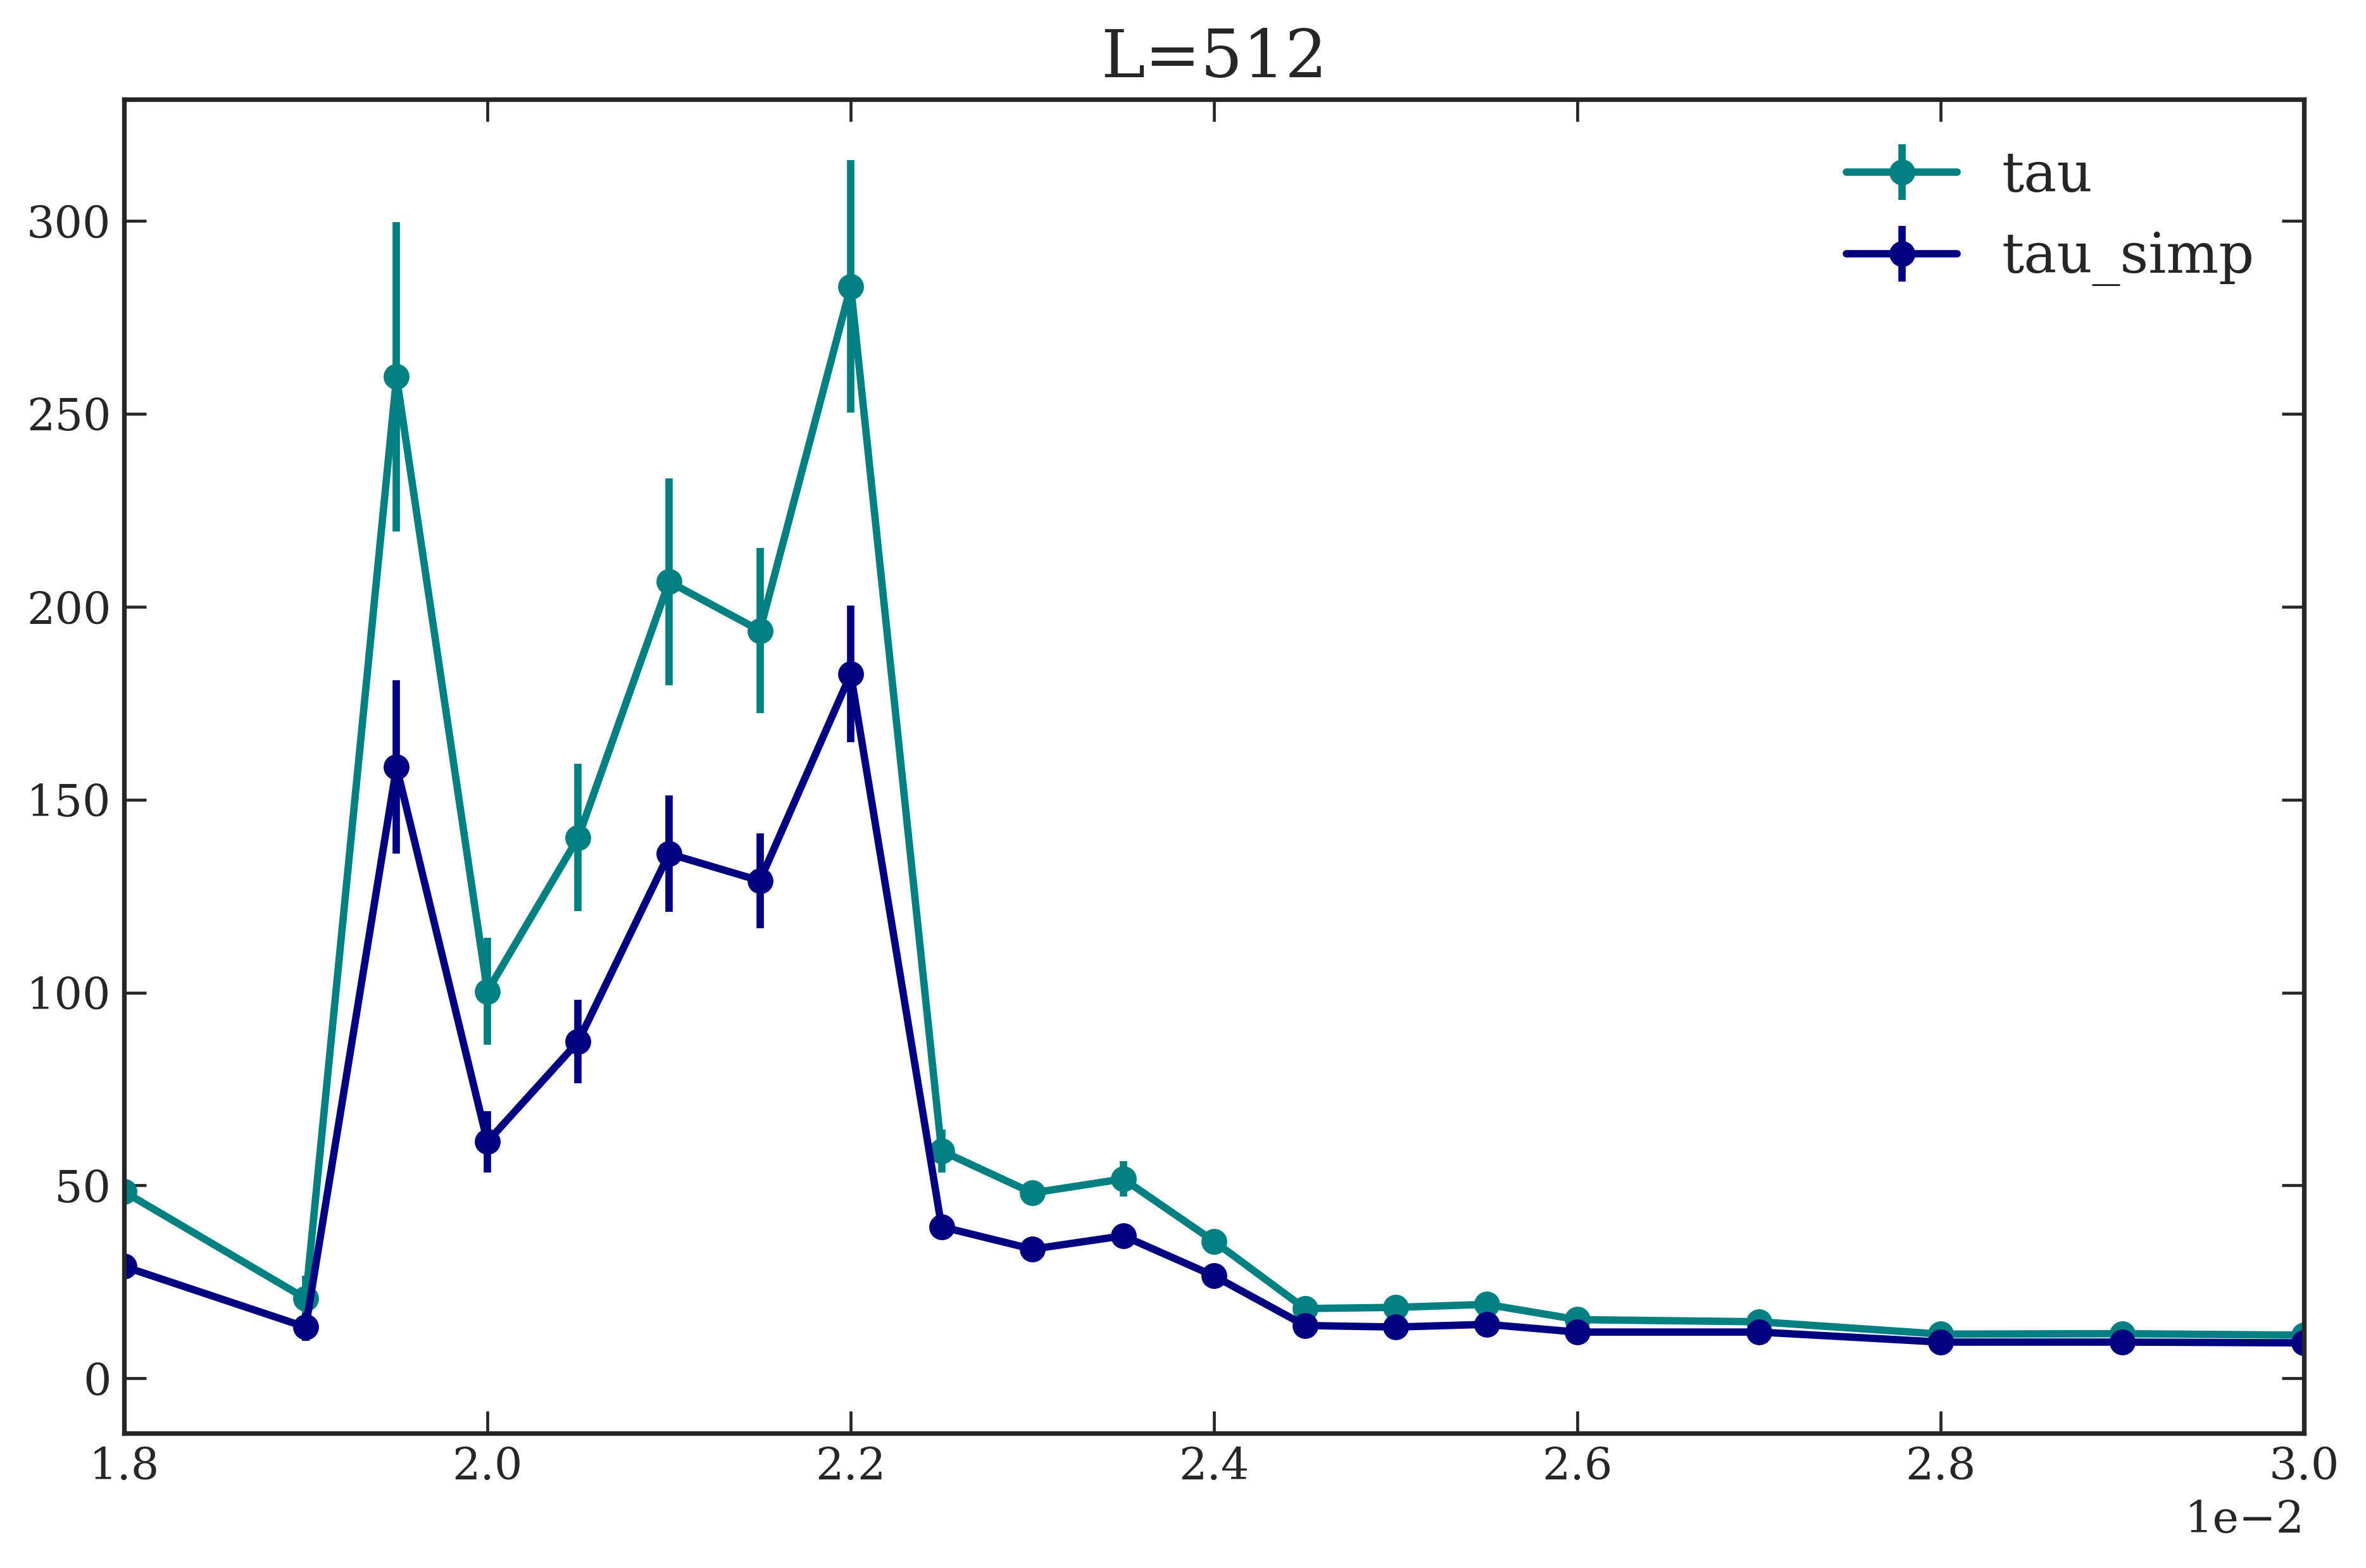

In [28]:
plt.errorbar(act_list,corr_time_av[0,:,0], yerr=corr_time_av[0,:,1], label='tau', fmt='o-')
plt.errorbar(act_list,corr_time_av[1,:,0], yerr=corr_time_av[1,:,1], label='tau_simp', fmt='o-') 
plt.xlim(0.018, 0.03)
plt.title(f"L={LL}")
plt.legend()


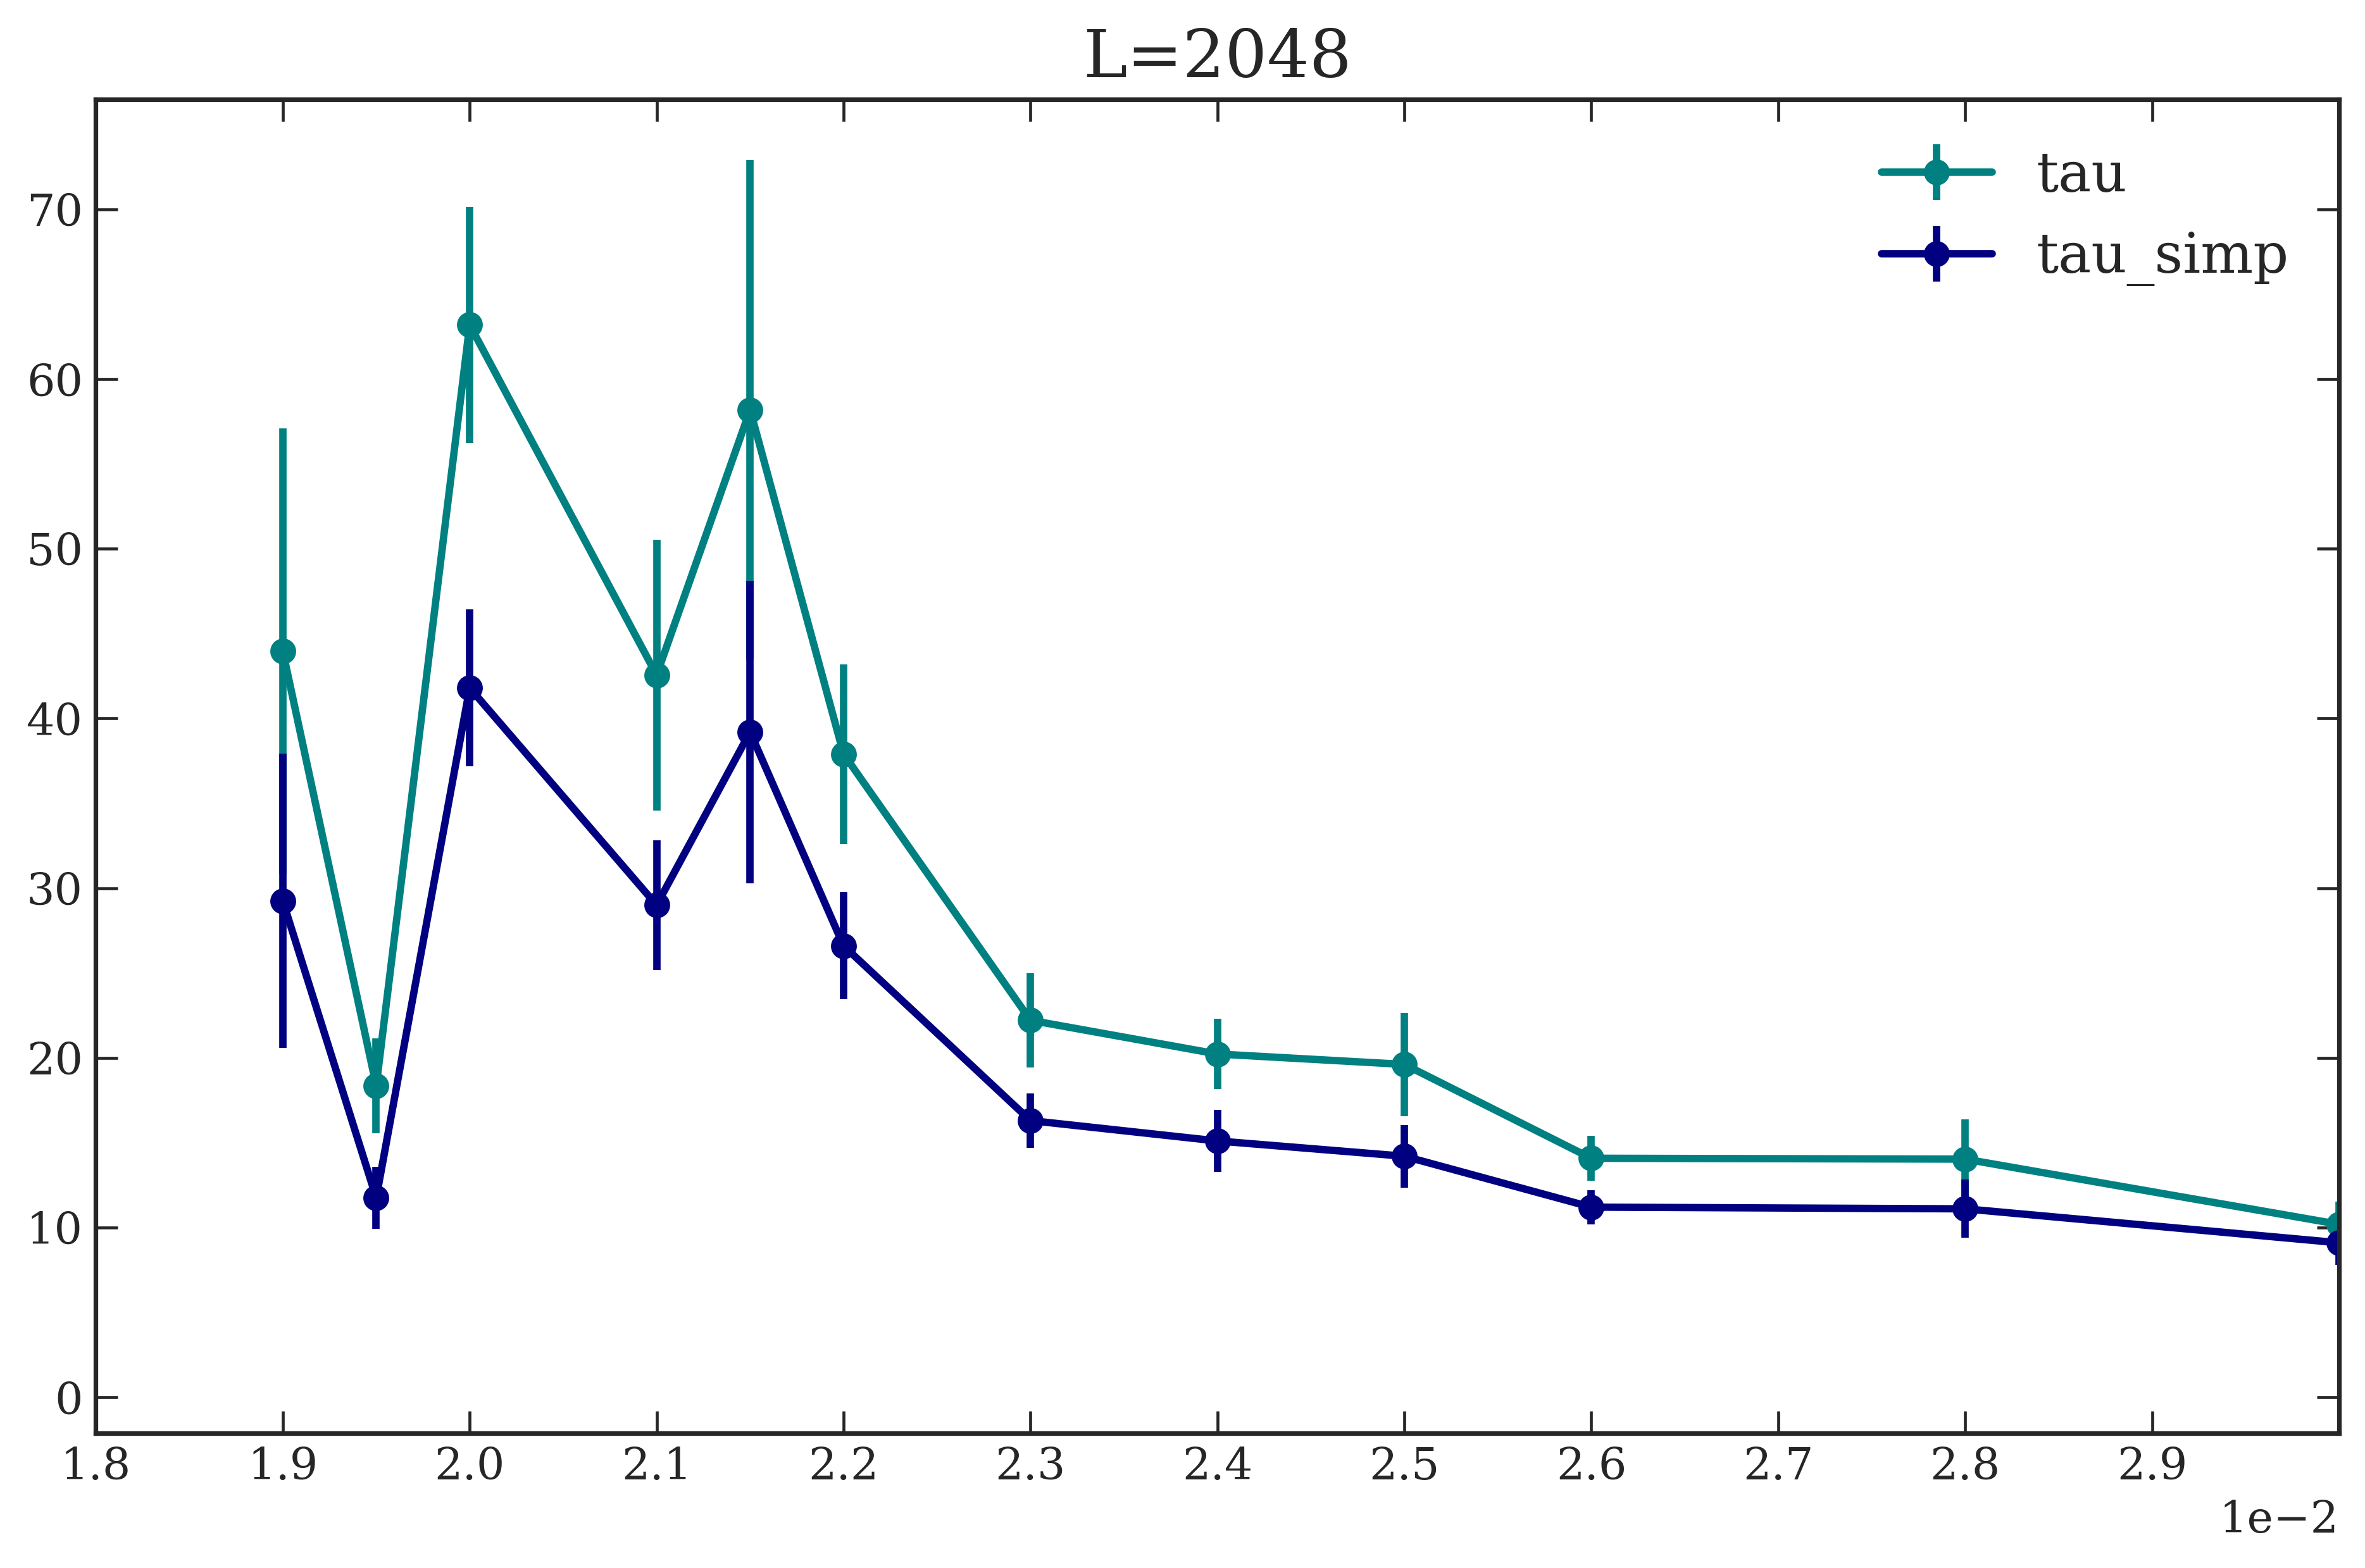

In [38]:
plt.errorbar(act_list,corr_time_av[0,:,0], yerr=corr_time_av[0,:,1], label='tau', fmt='o-')
plt.errorbar(act_list,corr_time_av[1,:,0], yerr=corr_time_av[1,:,1], label='tau_simp', fmt='o-') 
plt.xlim(0.018, 0.03)
plt.title(f"L={LL}")
plt.xticks(np.arange(0.018, 0.03, 0.001))
plt.legend()

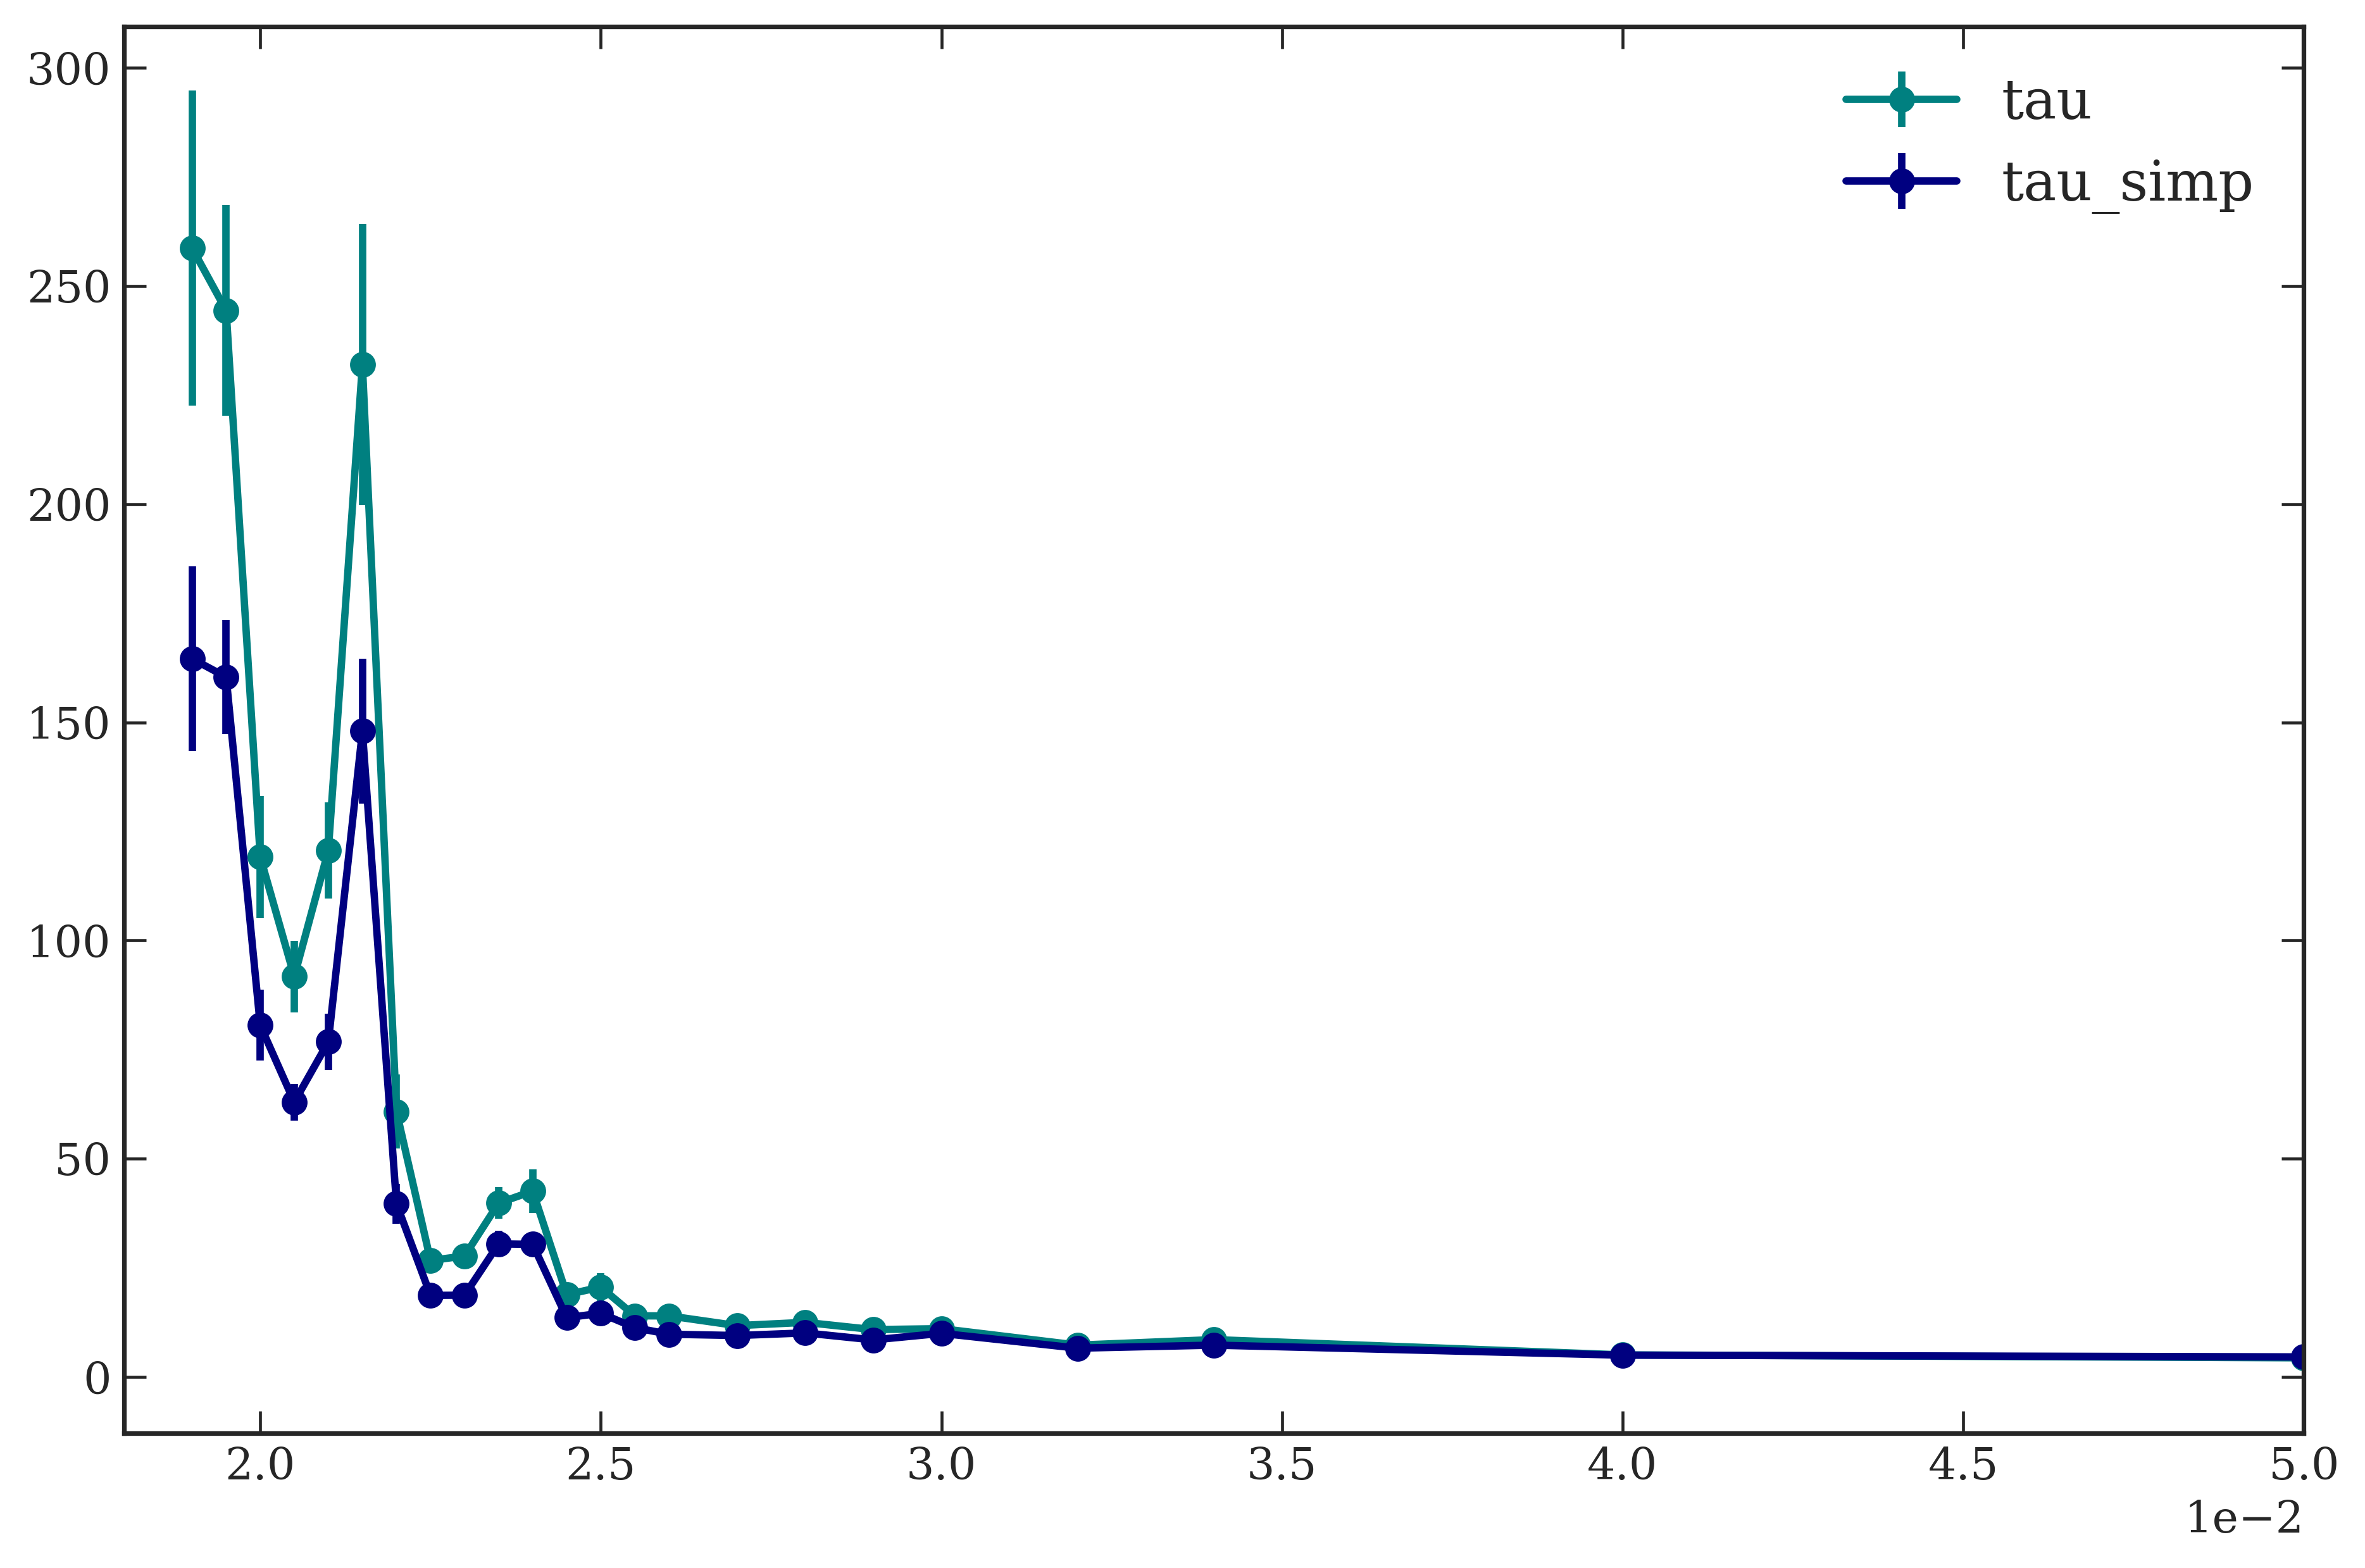

In [20]:

plt.errorbar(act_list,corr_time_av[0,:,0], yerr=corr_time_av[0,:,1], label='tau', fmt='o-')
plt.errorbar(act_list,corr_time_av[1,:,0], yerr=corr_time_av[1,:,1], label='tau_simp', fmt='o-') 
plt.xlim(0.018, 0.05)
plt.legend()

In [6]:
sfac_path = f'{ad.output_paths[-1]}\\sfac.npy'
sfac = np.load(sfac_path)

In [ ]:
for i, act in enumerate(ad.act_list[-1]):
    print(f'{i}: {act}')
    print(sfac[ad.conv_list[-1][i]:, :5, 0, i, :].mean(axis=(0,-1)))
    print(sfac[ad.conv_list[-1][i]:, :5, 1, i, :].mean(axis=(0,-1)))

In [4]:
ad.extract_results()

Analyse defects for input folder C:\Users\Simon Andersen\Documents\Uni\Speciale\Hyperuniformity\nematic_analysis1024_LL0.05
Analyse defects for input folder C:\Users\Simon Andersen\Documents\Uni\Speciale\Hyperuniformity\nematic_analysis1024_LL0.05_long
Analyse defects for input folder C:\Users\Simon Andersen\Documents\Uni\Speciale\Hyperuniformity\nematic_analysis1024_LL0.05_very_long


In [5]:
ad.analyze_defects()

NB: All simulations are set to converge at the first frame for dataset 0. To change this, call update_conv_list.

NB: All simulations are set to converge at the first frame for dataset 1. To change this, call update_conv_list.

NB: All simulations are set to converge at the first frame for dataset 2. To change this, call update_conv_list.



In [5]:
if extract:
    ad.extract_results()
if analyze:
    ad.analyze_defects()
if merge:
    ad.merge_results()

In [ ]:
for Ndataset in range(ad.Ndata):
    ad.plot_defects_per_activity(Ndataset=Ndataset, save=True)
ad.plot_defects_per_activity(use_merged=True, save=True)

In [ ]:
for Ndataset in range(ad.Ndata):
    ad.plot_hyperuniformity_sfac(Ndataset=Ndataset, weighted=False, save = True);

In [145]:
def plot_density_fluctuation_time_av(ad_object, Ndataset = 0, activity_list = [], act_idx_bounds = None, \
                                     window_idx_bounds = None, use_merged = False, save = False):
        
        LX = ad_object.LX[Ndataset]
        Ndataset = Ndataset if not use_merged else 0
        output_path = ad_object.output_path[Ndataset] if not use_merged else f'data\\nematic_analysis{LX}_LL0.05\\merged_results'
        custom_act_list = True if len(activity_list) > 0 else False
           
        if window_idx_bounds is None:
            window_idx_bounds = [0, len(ad_object.window_sizes[Ndataset])]
        if act_idx_bounds is None or custom_act_list:
            act_idx_bounds = [0, len(ad_object.act_list[Ndataset])]

        window_sizes = ad_object.window_sizes[Ndataset][window_idx_bounds[0]:window_idx_bounds[1]]
        act_list = ad_object.act_list[Ndataset][act_idx_bounds[0]:act_idx_bounds[1]]

        try:
            av_def = ad_object.get_arrays_av(Ndataset = Ndataset, use_merged = use_merged)[-1] / LX

            dens_fluc_av = ad_object.get_arrays_av(Ndataset = Ndataset, use_merged = use_merged)[-2][:, window_idx_bounds[0]:window_idx_bounds[1], act_idx_bounds[0]:act_idx_bounds[1]]
            
        except: 
            print('Density fluctuations not found. Analyse defects first.')
            return
        
       # dens_fluc_av *= av_def[:,0][None, None, :, None]

        min_vals = []

        fig, ax = plt.subplots(figsize=(8,6))
        for i, act in enumerate(act_list):
            if custom_act_list:
                if act not in activity_list:
                    continue

            act_idx = ad_object.act_list[Ndataset].index(act)

            dens_time_av = np.nanmean(dens_fluc_av[ad_object.conv_list[Ndataset][act_idx]:, :, i, 0], axis = 0)
            dens_time_std = np.nanstd(dens_fluc_av[ad_object.conv_list[Ndataset][act_idx]:, :, i, 0], axis = 0) \
                / np.sqrt(ad_object.Nframes[Ndataset] - ad_object.conv_list[Ndataset][act_idx])
            min_vals.append(dens_time_av[0])
            ax.errorbar(window_sizes, dens_time_av, dens_time_std, fmt='.', label = rf'$\zeta$ = {act}',\
                        capsize=2, capthick=1, elinewidth=1, markeredgewidth=2, alpha = 0.5, markersize=4)


        xticks = np.array([0.5, 1, 2.5, 5, 7.5, 10]) * ad_object.LX[Ndataset] / 100
        ax.set(xlabel = 'Window size / L ', ylabel = r'$\overline{\delta \rho ^2} ~/~ (\overline{\rho})^2$',\
               yscale = 'log', xscale = 'log', xticks = xticks, xticklabels = np.round(xticks / LX,3))
        ax.xaxis.set_minor_locator(ticker.NullLocator())
        ax.legend(fontsize = 12, ncol=3, loc = 'lower left')   
        fig.suptitle(rf'Time av. of $ \delta \rho^2$ vs window size (L = {LX})')
        fig.tight_layout()

        if save:
            if not os.path.isdir(os.path.join(output_path, 'figs')):
                os.makedirs(os.path.join(output_path, 'figs'))
            fig.savefig(os.path.join(output_path, f'figs\\dens_fluc_time_av.png'), dpi = 420, pad_inches=0.25)       
        return fig, ax, min_vals

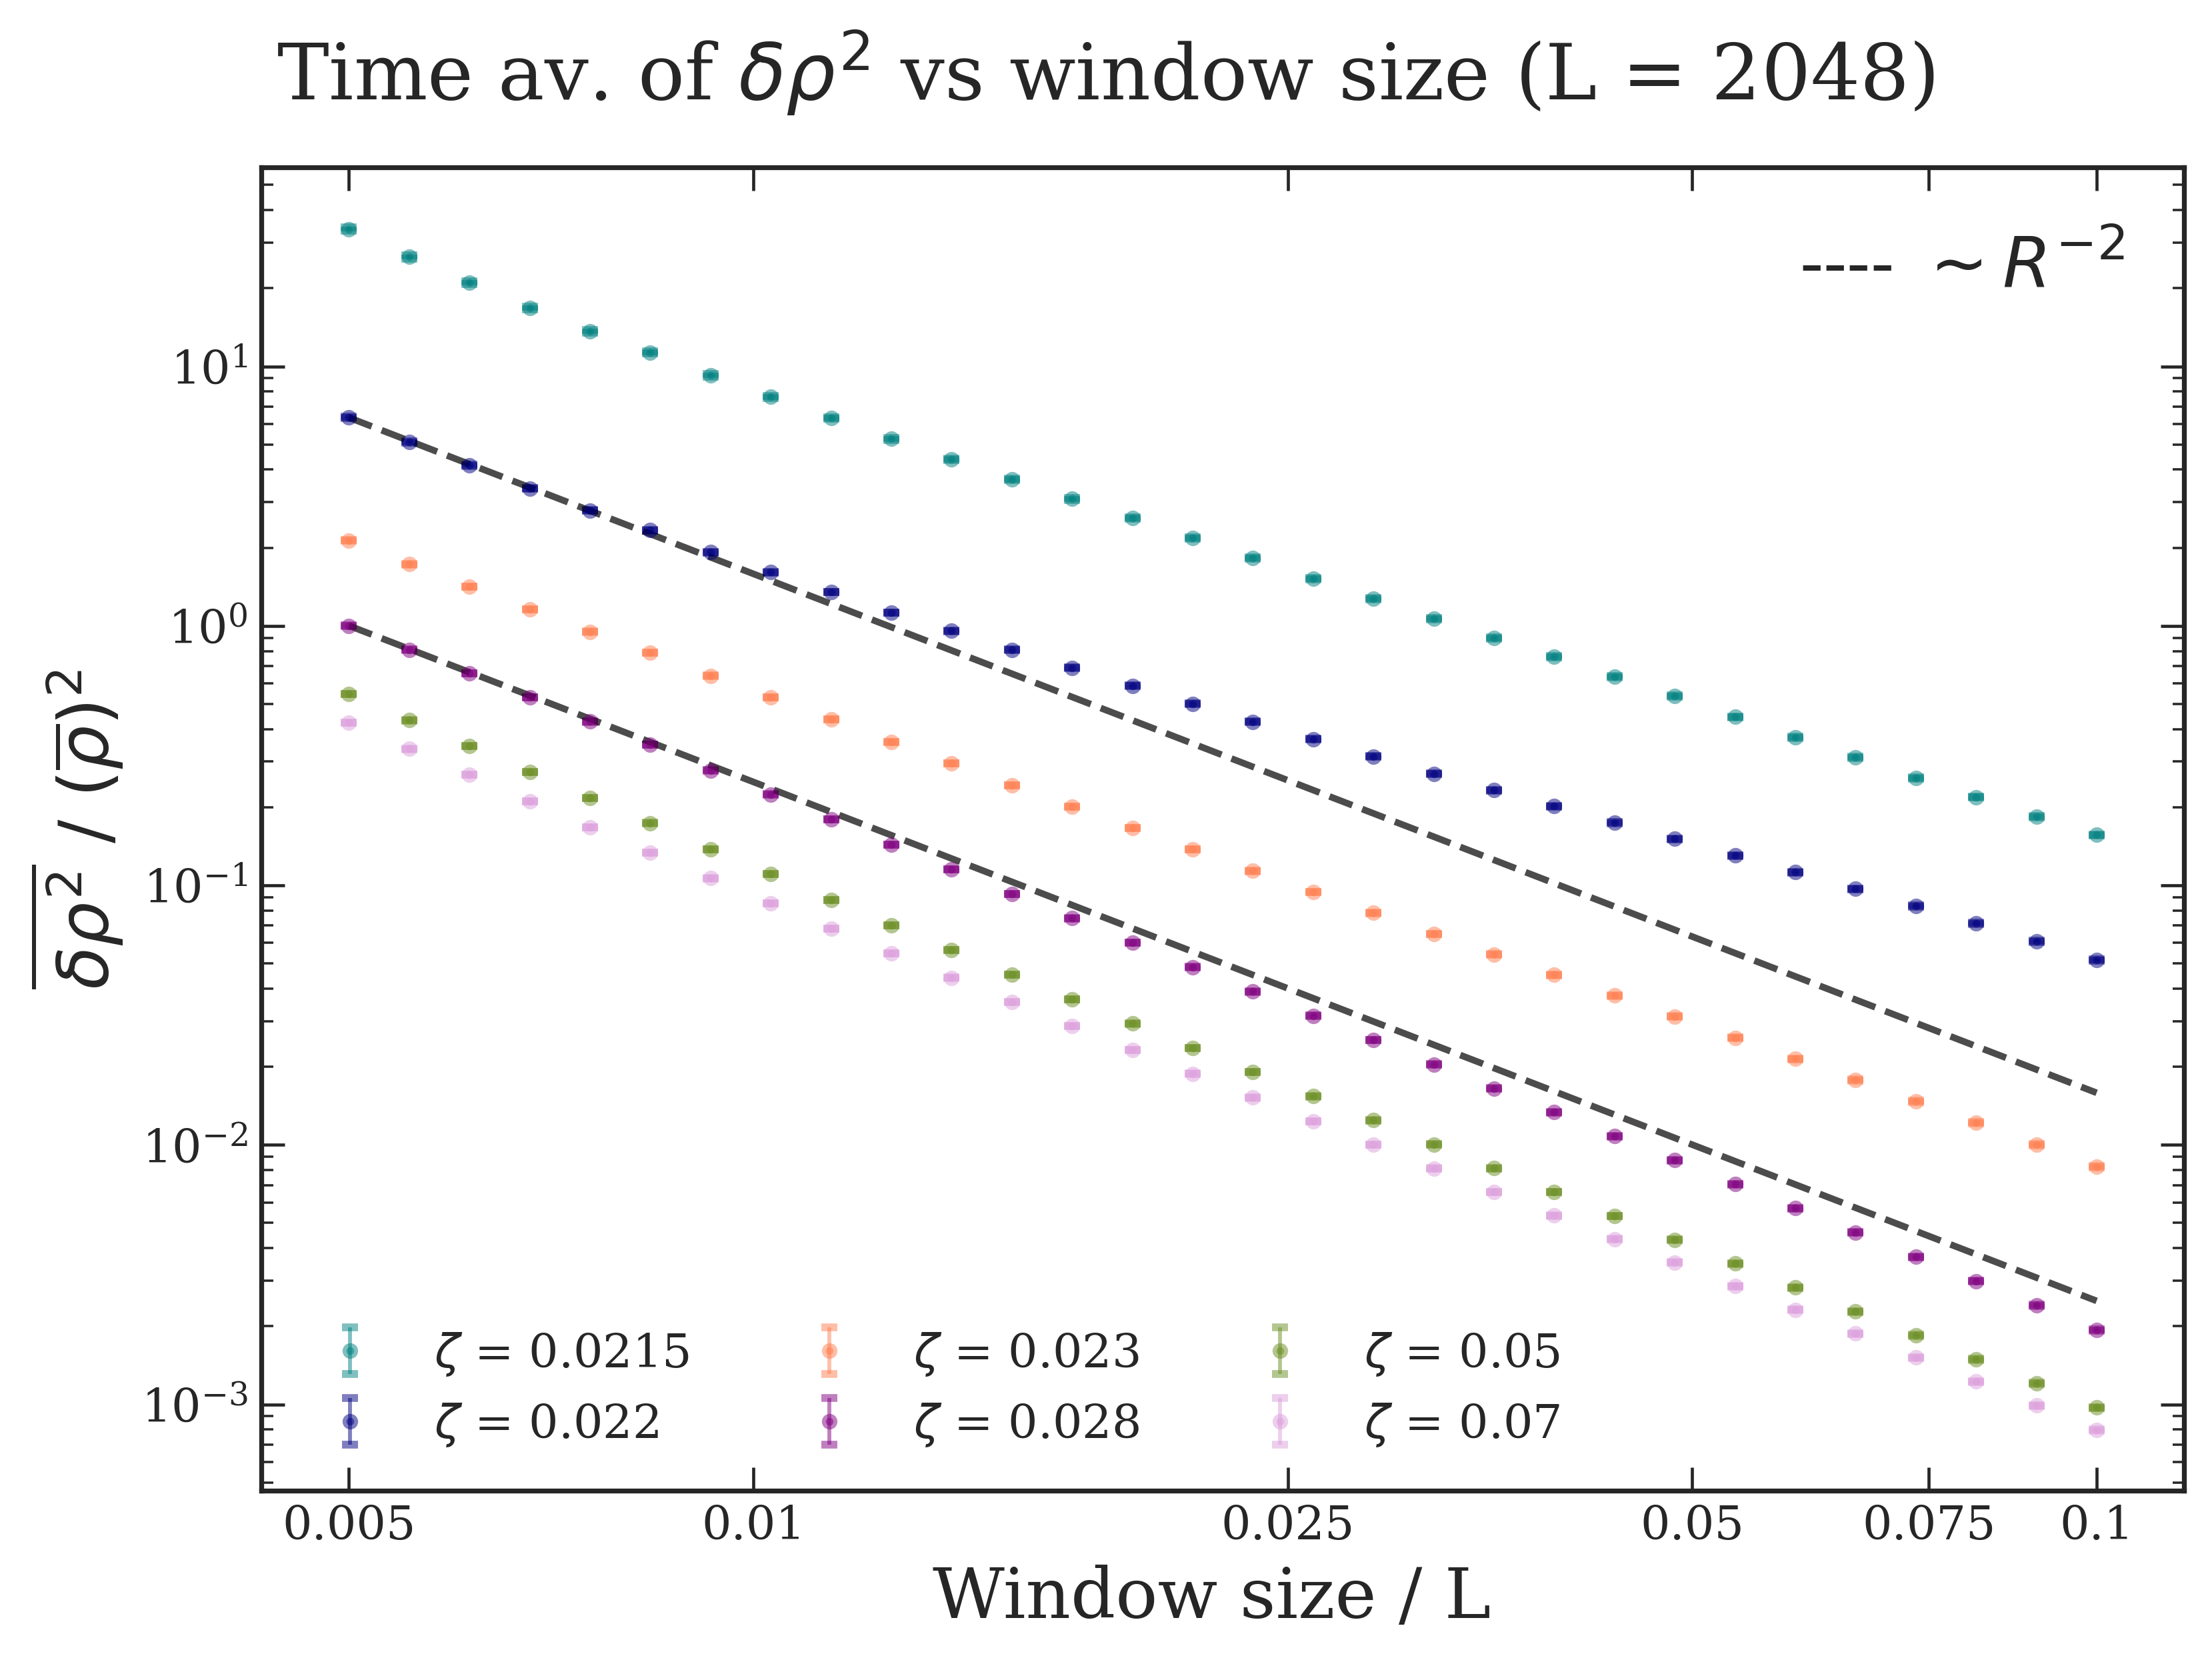

In [146]:
window_idx_bounds = [0, None]
act_idx_bounds = [4, -4]

acts_to_pop = [.024, .025, .026, 0.03, .032, 0.034, .04, .06]
acts_to_use = list(ad.act_list[0][act_idx_bounds[0]:act_idx_bounds[1]])
for act in acts_to_pop:
    acts_to_use.remove(act)
fig, ax, min_vals = plot_density_fluctuation_time_av(ad, activity_list=acts_to_use, act_idx_bounds = act_idx_bounds, \
                                           window_idx_bounds = window_idx_bounds, use_merged = True, save = True)

window_sizes = ad.window_sizes[0][window_idx_bounds[0]:window_idx_bounds[1]] #/ ad.LX[0]
min_val = 6

for i, val_idx in enumerate([1, 3]):
    val = min_vals[val_idx] 


    label = r'$\sim R^{-2}$' if i == 0 else None
    ax.plot(window_sizes, (val * window_sizes[0] ** 2) / window_sizes ** 2, \
            '--', color='black', alpha=0.7, lw = 1.7, label = label)


#ax.plot(window_sizes, (min_val * window_sizes[0] ** 2) / window_sizes ** 2, '--', color='black', alpha=0.7, lw = 1.7)
ax.text(0.8, 0.95, r'---- $\sim R^{-2}$', fontsize=18, transform=ax.transAxes, verticalalignment='top', fontweight='normal')
#ax.plot(window_sizes, (1 * window_sizes[0] ** 2) / window_sizes ** 2, '--', color='black', alpha=0.7, lw = 1.7)
#ax.plot(window_sizes, 13000/ window_sizes ** 3, '--', color='black', alpha=0.7, lw = 1.7)
#ax.text(0.15, 0.95, r'$\sim R^{-3}$', transform=ax.transAxes, fontsize=15, verticalalignment='top', fontweight='normal')
#ax.plot(window_sizes, (min_vals[1] * window_sizes[0] ** 2) / window_sizes ** 2, '--', color='black', alpha=0.7, lw = 1.7)
#ax.set_ylim(bottom = 7e-4, top = 40)
#ax.legend(ncol=2)
output_path = f'data\\nematic_analysis{LL}_LL0.05\\merged_results'
fig.savefig(os.path.join(output_path, f'figs\\dens_fluc_time_av.png'), dpi = 420, pad_inches=0.25)
